### notebook fot gene-pairwise analysis of kidera and other factors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
import peptides

In [2]:
#gene freqs OLGA
olga_trb = pd.read_csv('/home/dluppov/TRB_10_7.tsv', sep = '\t', header = None)
olga_trb.rename(columns = {0: 'seq', 1: 'aa', 2: 'V_gene', 3: 'J_gene'}, inplace = True)
olga_trb_freq = olga_trb.V_gene.value_counts()
olga_trb_freq.index = pd.Series(olga_trb_freq.index).apply(lambda x: x.split('-')[0])
olga_trb_freq = olga_trb_freq.groupby(level = 0).sum()
olga_trb_freq

TRBV10     516380
TRBV11     418505
TRBV12     419143
TRBV13     338684
TRBV14     221979
TRBV15     112138
TRBV16       3518
TRBV18     153135
TRBV19     344646
TRBV2      198693
TRBV20     708620
TRBV24     422665
TRBV25     131784
TRBV27     485235
TRBV28     291071
TRBV29     220532
TRBV3      229588
TRBV30     218106
TRBV4      380033
TRBV5     1044736
TRBV6     1450722
TRBV7     1299677
TRBV9      390410
Name: V_gene, dtype: int64

In [3]:
# gene greqs KECK
keck_raw = pd.read_csv('naive_clonotypes_keck_nt.csv.gz')
keck_raw = keck_raw.loc[np.logical_and(keck_raw.cdr3aa.str.startswith('C'),
               np.logical_or(keck_raw.cdr3aa.str.endswith('W'), keck_raw.cdr3aa.str.endswith('F')))]
               
keck_raw_freq = keck_raw.v.value_counts()
keck_raw_freq.index = pd.Series(keck_raw_freq.index).apply(lambda x: x.split(',')[0])
keck_raw_freq = keck_raw_freq.groupby(level = 0).sum()
keck_raw_freq.index = pd.Series(keck_raw_freq.index).apply(lambda x: x.split('-')[0])
keck_raw_freq = keck_raw_freq.groupby(level = 0).sum()
keck_raw_freq

TRBV1        682
TRBV10     31016
TRBV11     40892
TRBV12     58492
TRBV13      9344
TRBV14     10385
TRBV15     15514
TRBV16      1070
TRBV18     30741
TRBV19     57394
TRBV2      41877
TRBV20    100371
TRBV21      5577
TRBV22         9
TRBV23      2163
TRBV24     19346
TRBV25     10714
TRBV27     47836
TRBV28     58184
TRBV29     26688
TRBV3      37119
TRBV30     35304
TRBV4      59754
TRBV5     131492
TRBV6     137908
TRBV7     131119
TRBV8         10
TRBV9      46249
Name: v, dtype: int64

In [4]:
#same order
olga_trb_freq = olga_trb_freq.sort_values(ascending=False)
keck_raw_freq = keck_raw_freq[olga_trb_freq.index]

<AxesSubplot:ylabel='Count'>

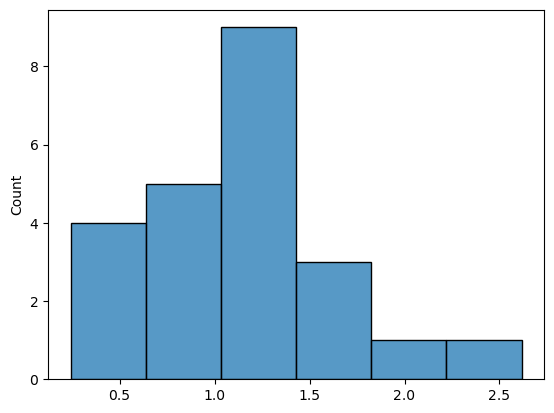

In [5]:
#ratio of gene freqs
freq_compare = (keck_raw_freq/keck_raw_freq.sum())/(olga_trb_freq/olga_trb_freq.sum())
sns.histplot(freq_compare)

# Physical properties

In [17]:
import peptides

/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


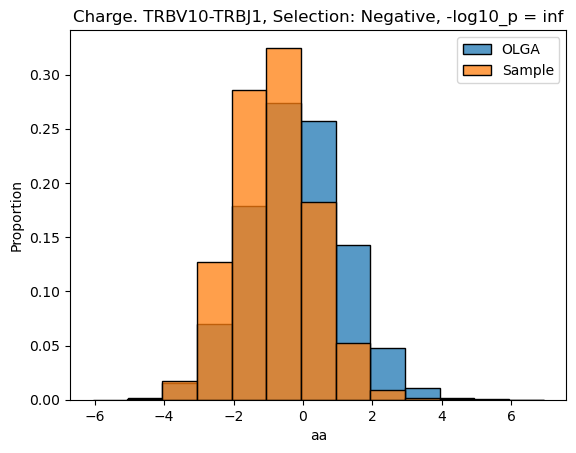

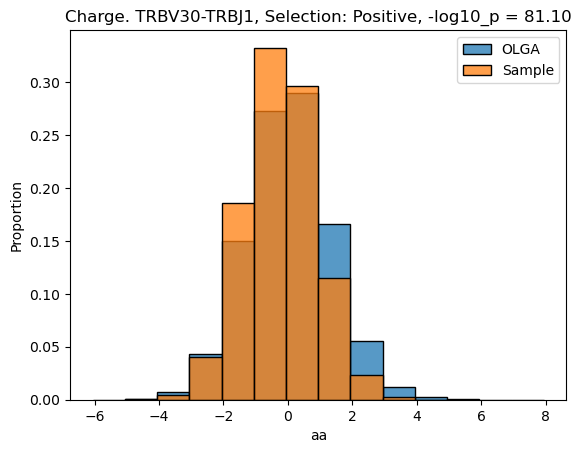

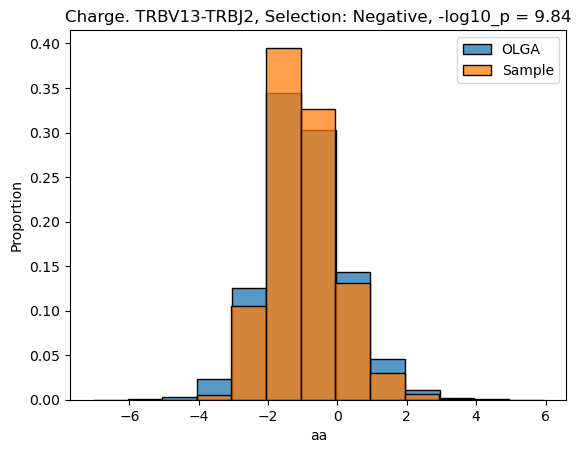

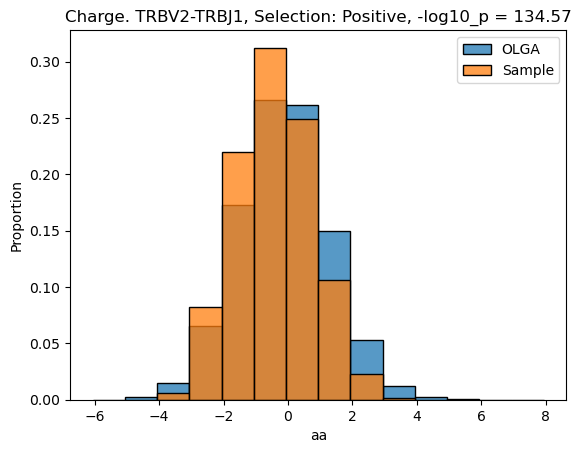

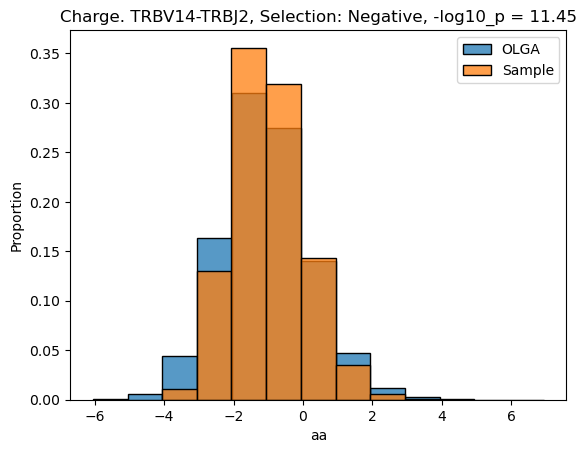

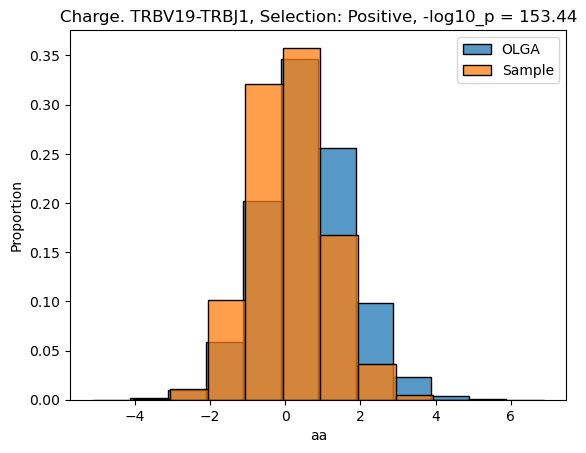

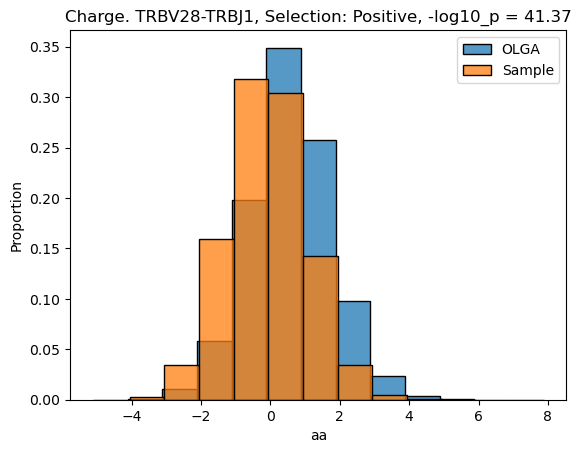

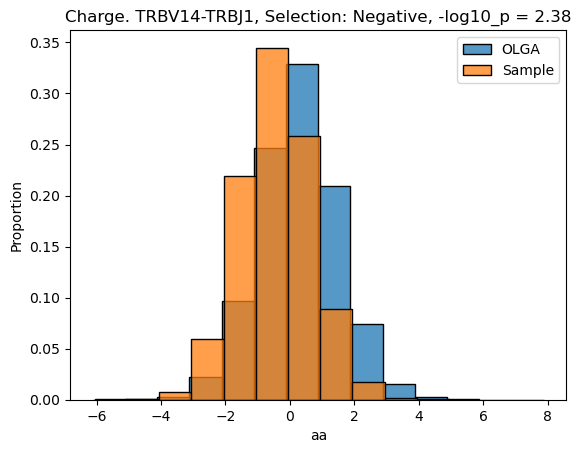

/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


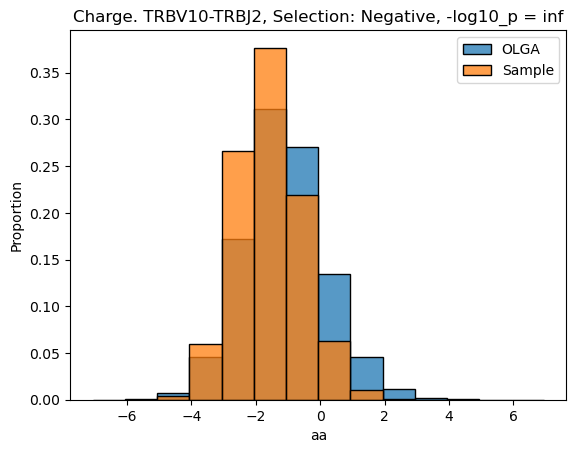

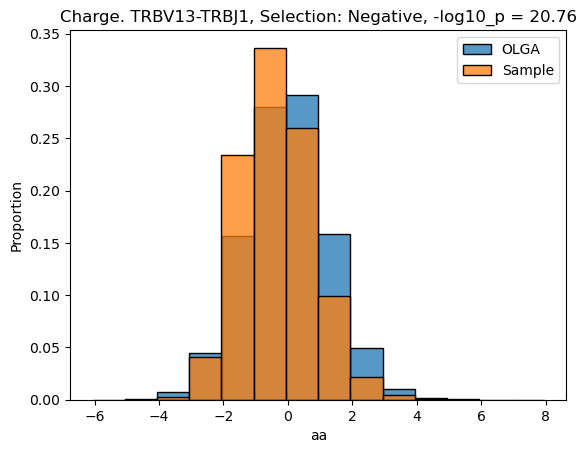

/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


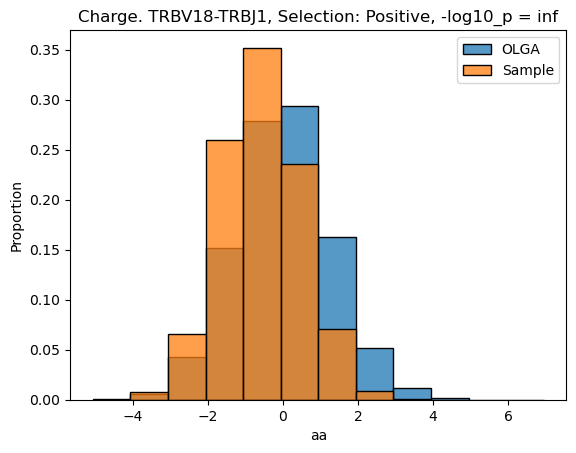

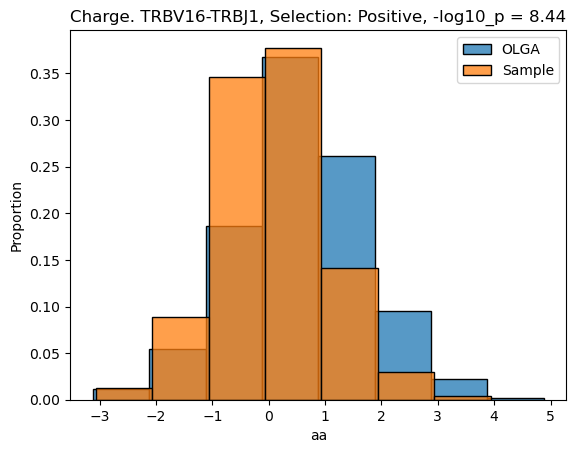

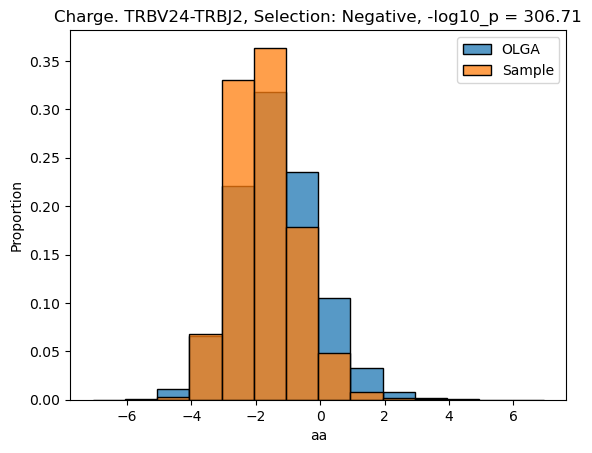

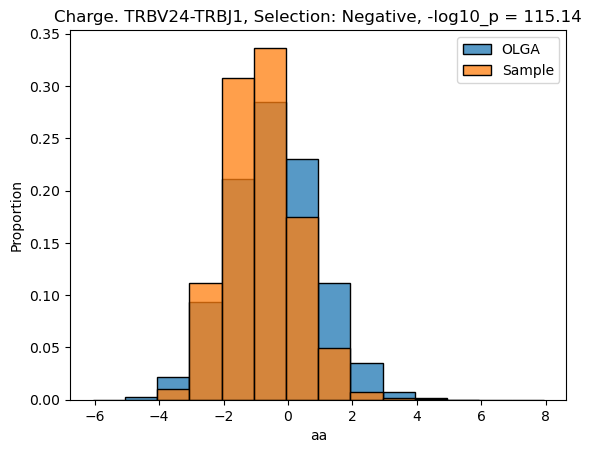

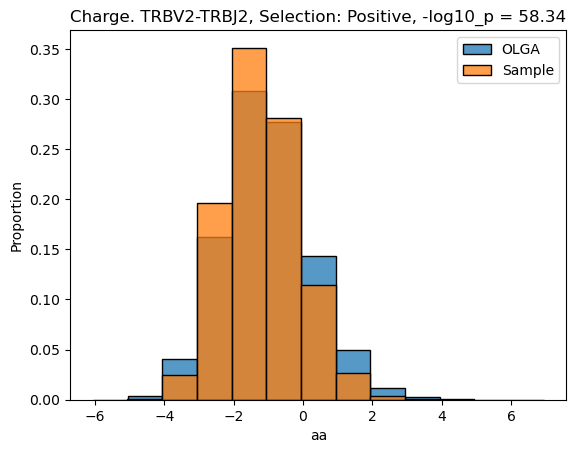

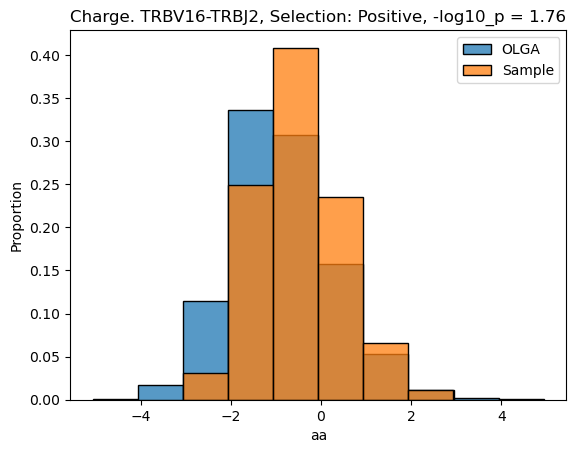

In [19]:
#charge difference in genes with largest freqs ratios
for gene in comp_pairs_freq_sign.index:

    keck_raw_gene = keck_raw[keck_raw.VJ == gene]
    olga_trb_gene = olga_trb[olga_trb.VJ == gene]
    keck_raw_gene_charge = keck_raw_gene.cdr3aa.apply(lambda x: peptides.Peptide(x).charge())
    olga_trb_gene_charge = olga_trb_gene.aa.apply(lambda x: peptides.Peptide(x).charge())
    #sns.set(rc={'axes.facecolor':'r'})
    sns.histplot(olga_trb_gene_charge, binwidth= 1 , stat = 'proportion', label = 'OLGA')
    sns.histplot(keck_raw_gene_charge, binwidth= 1 , stat = 'proportion', label = 'Sample')
    selection = 'Positive' if comp_pairs_freq_sign[gene] > 1 else 'Negative'
    log10_pval = -np.log10(scp.stats.ttest_ind(keck_raw_gene_charge, olga_trb_gene_charge, equal_var = False).pvalue)
    plt.title(f'Charge. {gene}, Selection: {selection}, -log10_p = {log10_pval:.2f}')
    plt.legend()
    plt.show()

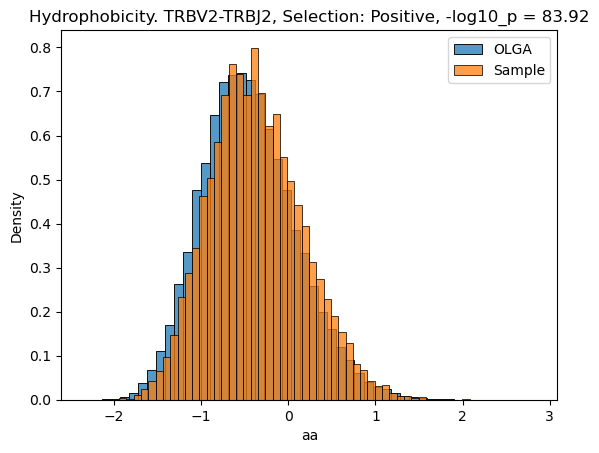

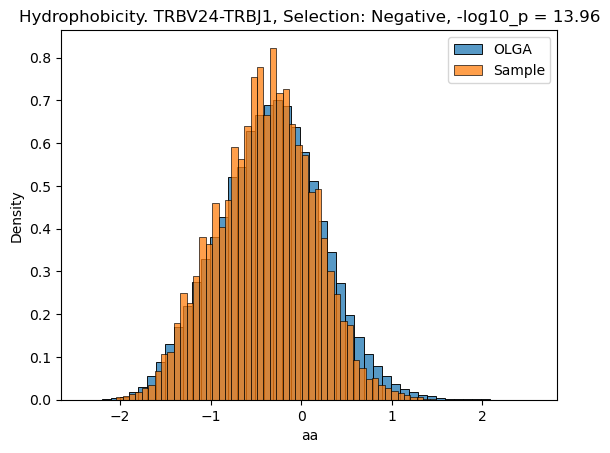

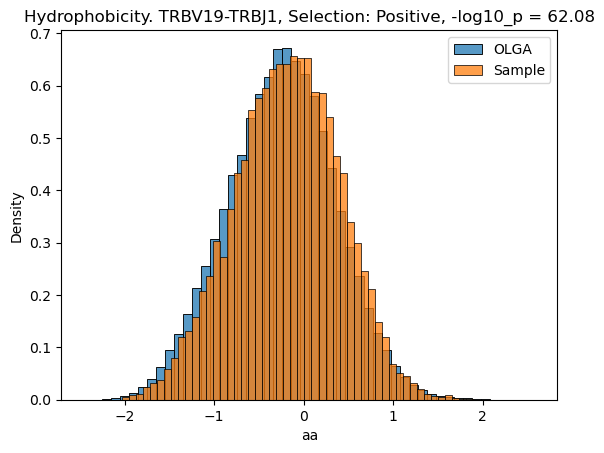

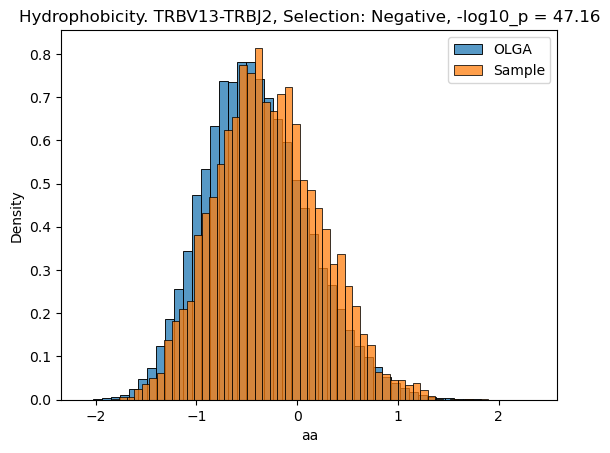

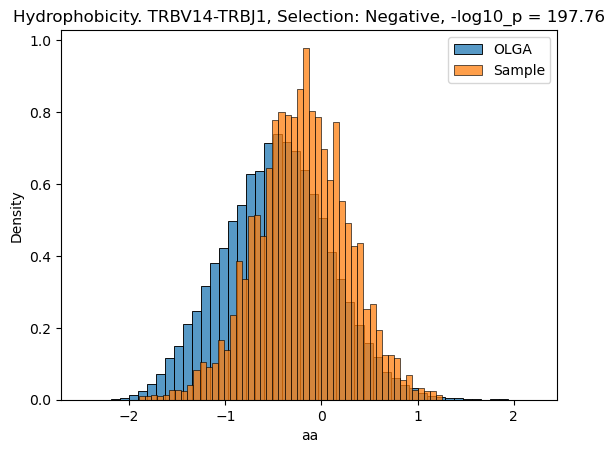

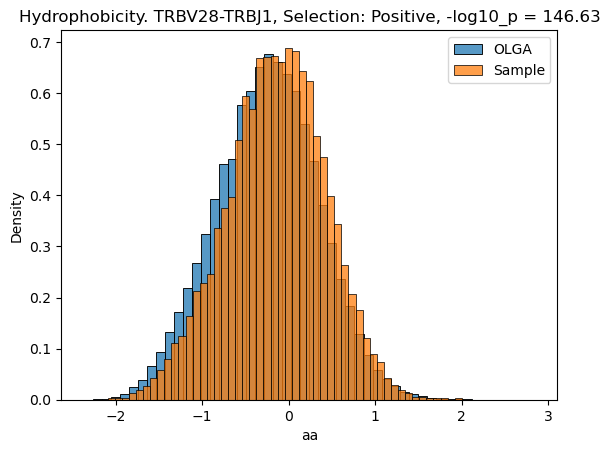

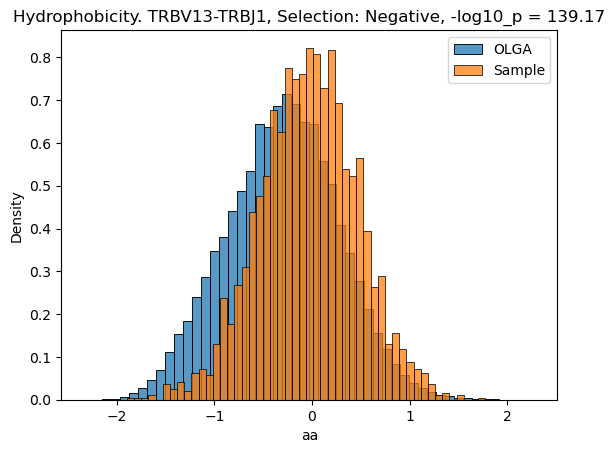

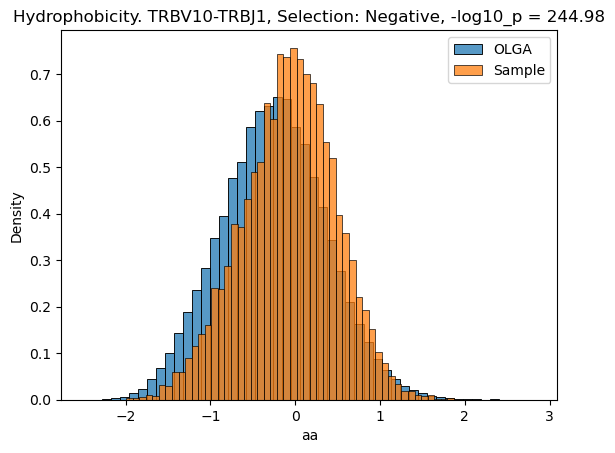

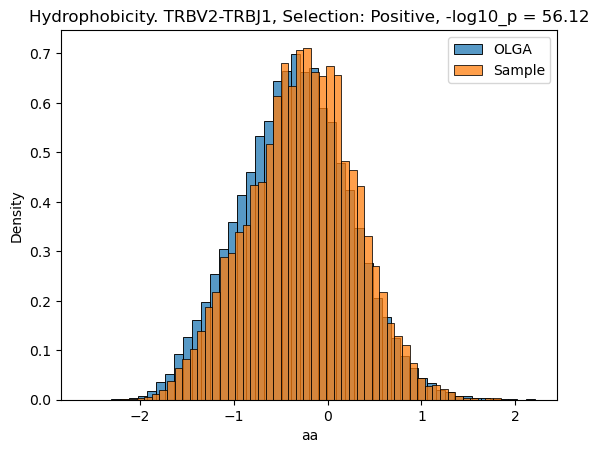

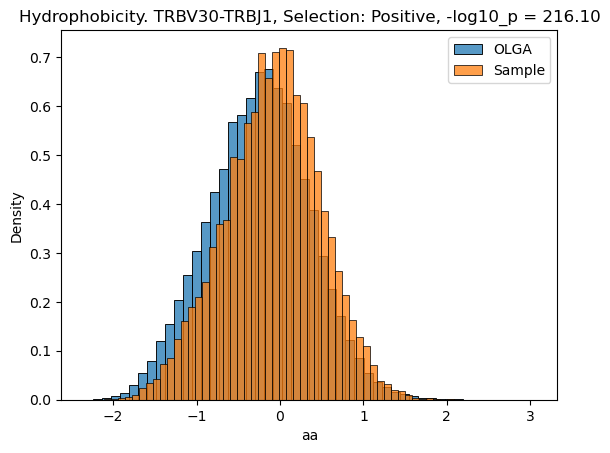

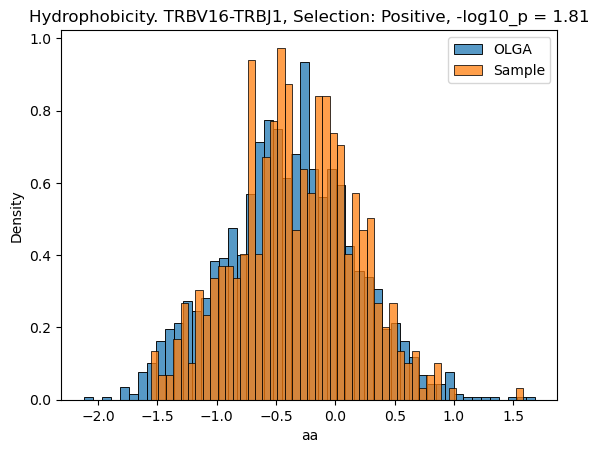

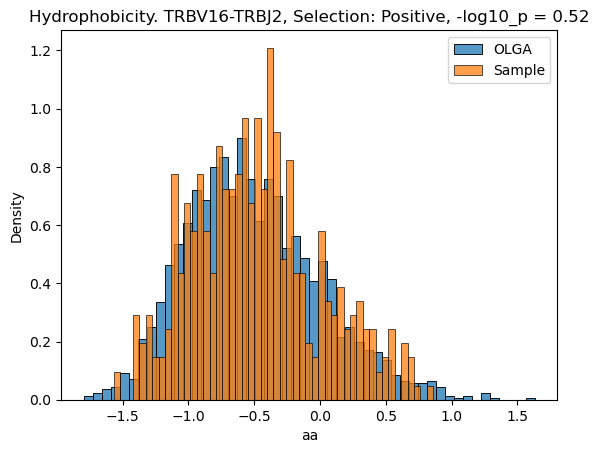

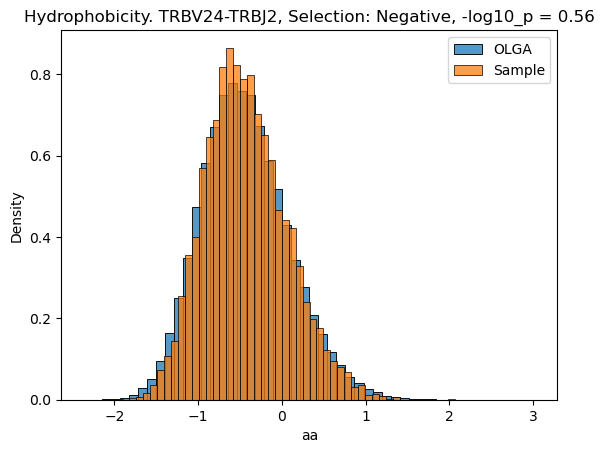

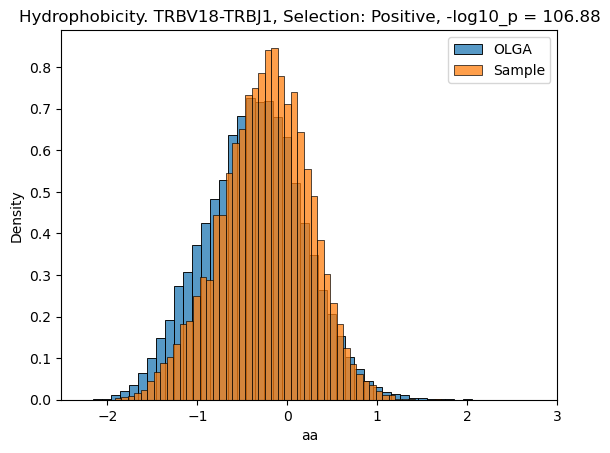

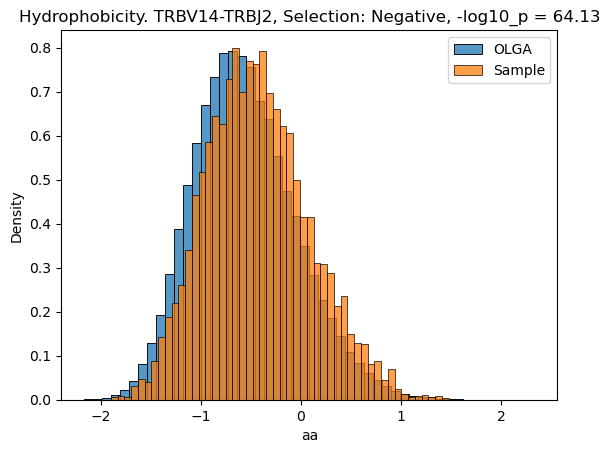

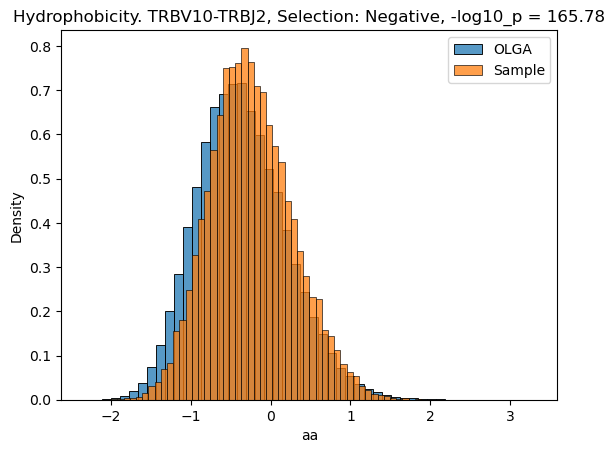

In [44]:
#Hydrophobicity difference in genes with largest freqs ratios
for gene in comp_pairs_freq_sign.index:

    keck_raw_gene = keck_raw[keck_raw.VJ == gene]
    olga_trb_gene = olga_trb[olga_trb.VJ == gene]
    keck_raw_gene_charge = keck_raw_gene.cdr3aa.apply(lambda x: peptides.Peptide(x).hydrophobicity())
    olga_trb_gene_charge = olga_trb_gene.aa.apply(lambda x: peptides.Peptide(x).hydrophobicity())
    #sns.set(rc={'axes.facecolor':'r'})
    sns.histplot(olga_trb_gene_charge, bins = 50 , stat = 'density', label = 'OLGA')
    sns.histplot(keck_raw_gene_charge, bins = 50 , stat = 'density', label = 'Sample')
    selection = 'Positive' if comp_pairs_freq_sign[gene] > 1 else 'Negative'
    log10_pval = -np.log10(scp.stats.ttest_ind(keck_raw_gene_charge, olga_trb_gene_charge, equal_var = False).pvalue)
    plt.title(f'Hydrophobicity. {gene}, Selection: {selection}, -log10_p = {log10_pval:.2f}')
    plt.legend()
    plt.show()

In [22]:
#Kidera difference in genes with largest freqs ratios

kidera_dict = {}

for gene in comp_pairs_freq_sign.index:
    keck_raw_gene = keck_raw[keck_raw.VJ == gene]
    olga_trb_gene = olga_trb[olga_trb.VJ == gene]
    kidera_dict[gene] = {'Sample':keck_raw_gene.cdr3aa.apply(lambda x: peptides.Peptide(x).kidera_factors()),
                         'OLGA': olga_trb_gene.aa.apply(lambda x: peptides.Peptide(x).kidera_factors())}

# Kideras distribution for gene pairs with largest selection ratios

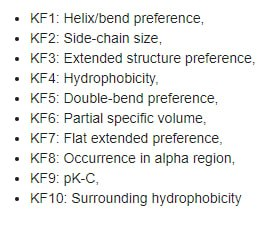

In [44]:
#files created in a senction Inpairs scaling

olga_kid = pd.read_csv('/home/dluppov/OLGA_all_kideras.csv', index_col=0)
keck_kid = pd.read_csv('/home/dluppov/keck_all_kideras.csv', index_col=0)

In [6]:
gene_pairs = list(set(olga_kid.VJ))

['TRBV5-TRBJ1',
 'TRBV24-TRBJ2',
 'TRBV15-TRBJ2',
 'TRBV29-TRBJ2',
 'TRBV2-TRBJ1',
 'TRBV18-TRBJ1',
 'TRBV10-TRBJ1',
 'TRBV19-TRBJ2',
 'TRBV16-TRBJ1',
 'TRBV10-TRBJ2',
 'TRBV9-TRBJ1',
 'TRBV6-TRBJ1',
 'TRBV5-TRBJ2',
 'TRBV4-TRBJ2',
 'TRBV2-TRBJ2',
 'TRBV13-TRBJ2',
 'TRBV4-TRBJ1',
 'TRBV20-TRBJ1',
 'TRBV12-TRBJ2',
 'TRBV27-TRBJ2',
 'TRBV14-TRBJ1',
 'TRBV24-TRBJ1',
 'TRBV25-TRBJ1',
 'TRBV18-TRBJ2',
 'TRBV11-TRBJ2',
 'TRBV7-TRBJ1',
 'TRBV9-TRBJ2',
 'TRBV19-TRBJ1',
 'TRBV16-TRBJ2',
 'TRBV14-TRBJ2',
 'TRBV15-TRBJ1',
 'TRBV3-TRBJ1',
 'TRBV6-TRBJ2',
 'TRBV27-TRBJ1',
 'TRBV30-TRBJ1',
 'TRBV3-TRBJ2',
 'TRBV20-TRBJ2',
 'TRBV25-TRBJ2',
 'TRBV7-TRBJ2',
 'TRBV13-TRBJ1',
 'TRBV11-TRBJ1',
 'TRBV30-TRBJ2',
 'TRBV29-TRBJ1',
 'TRBV28-TRBJ2',
 'TRBV28-TRBJ1',
 'TRBV12-TRBJ1']

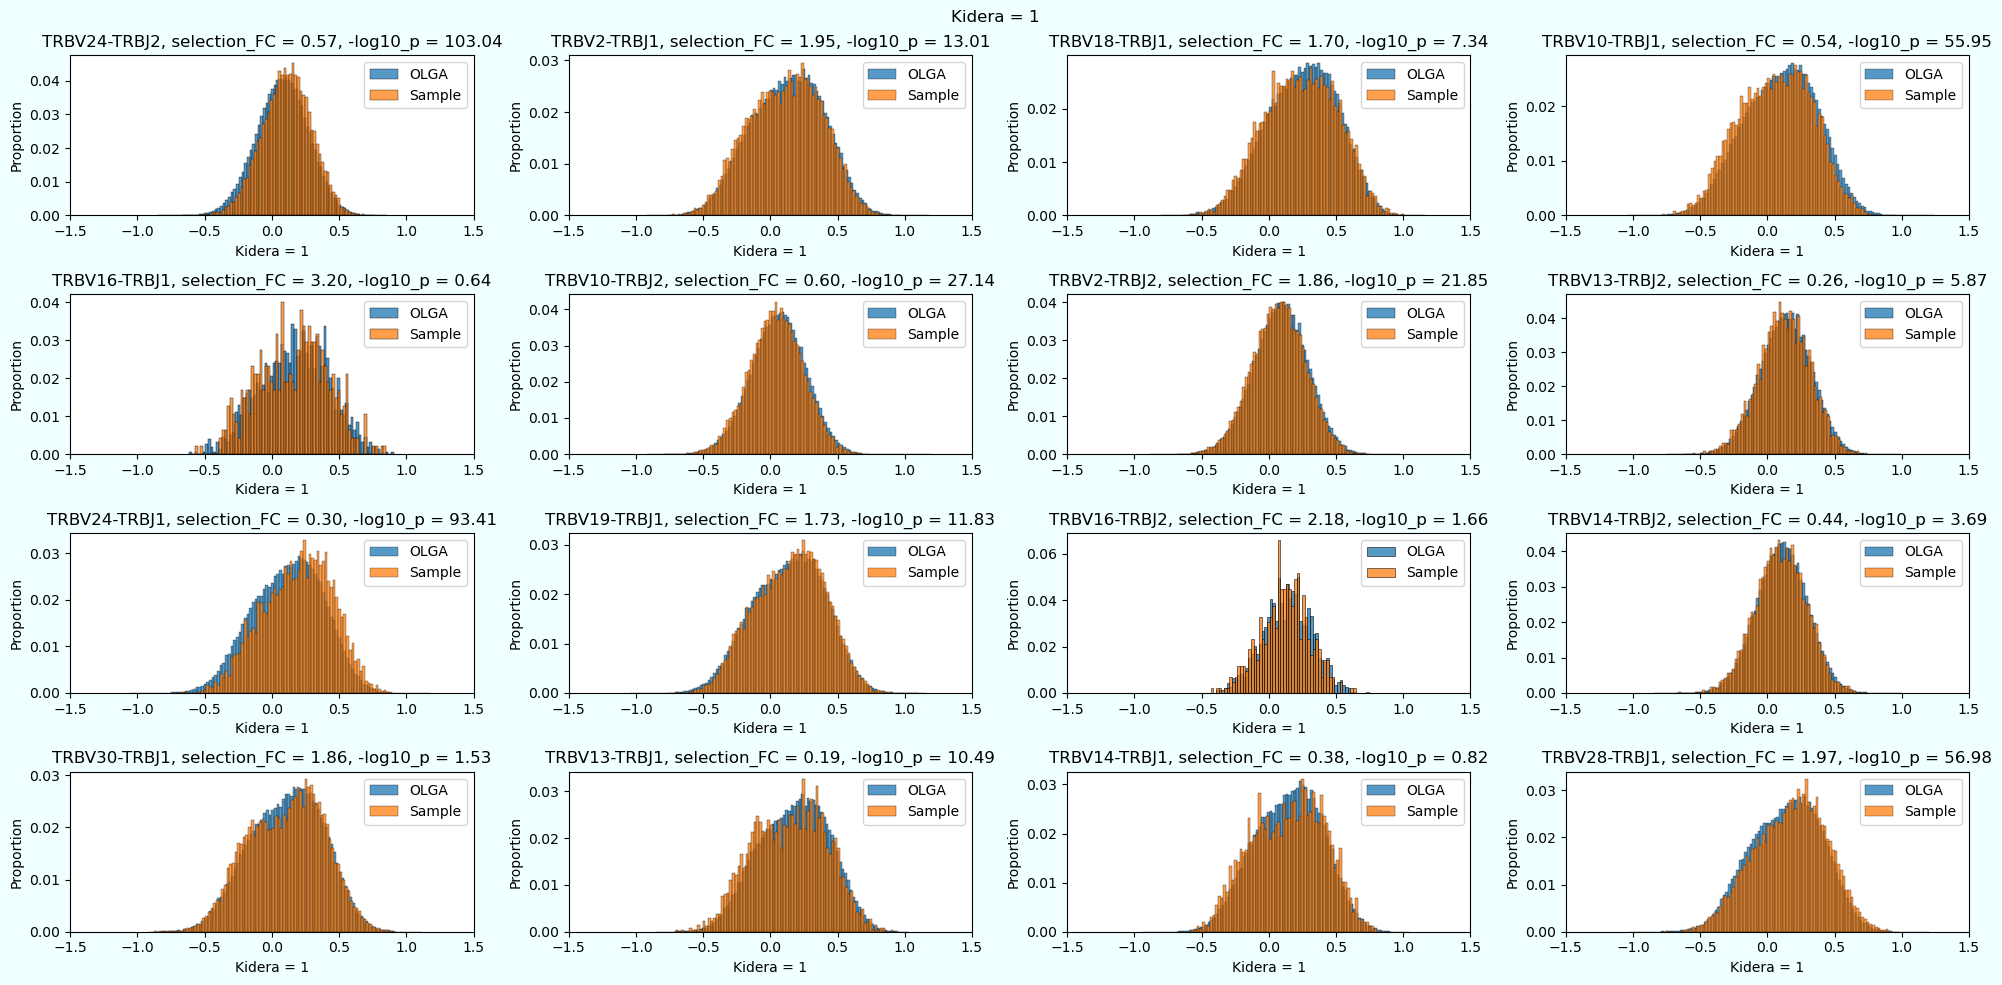

/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


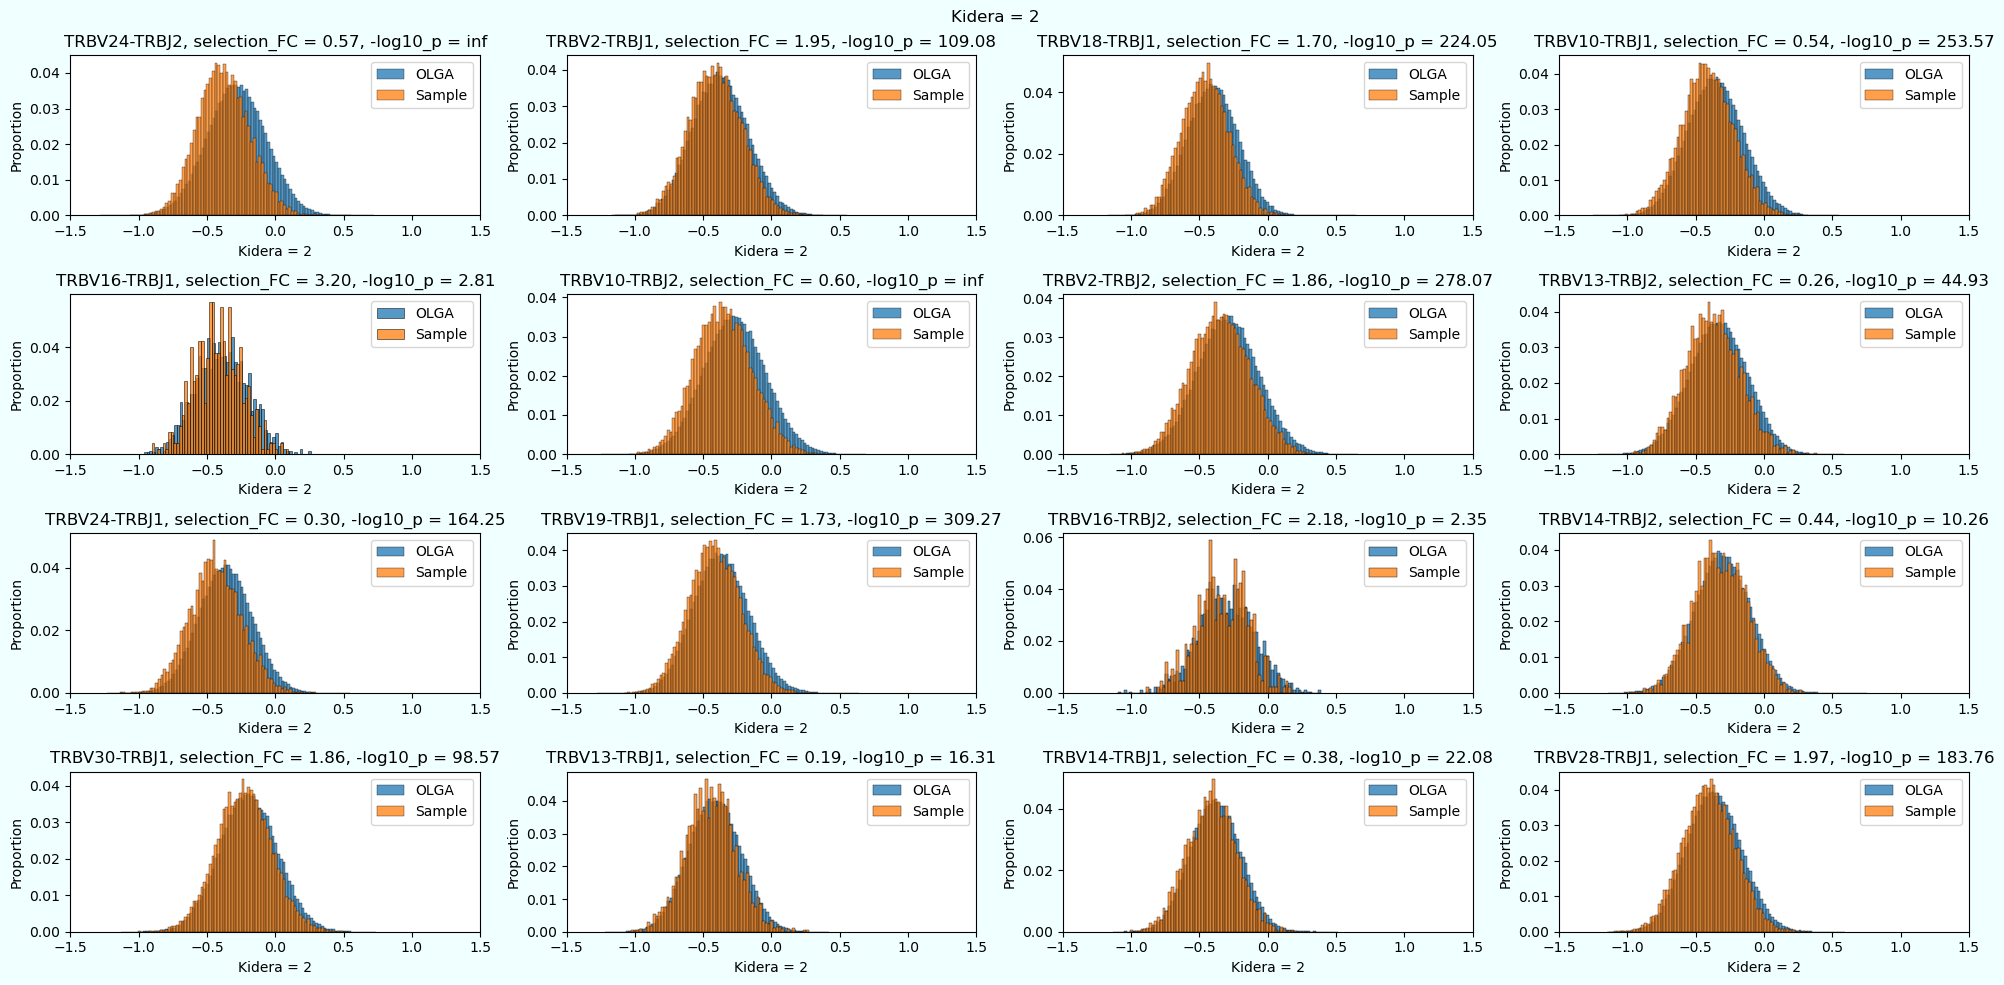

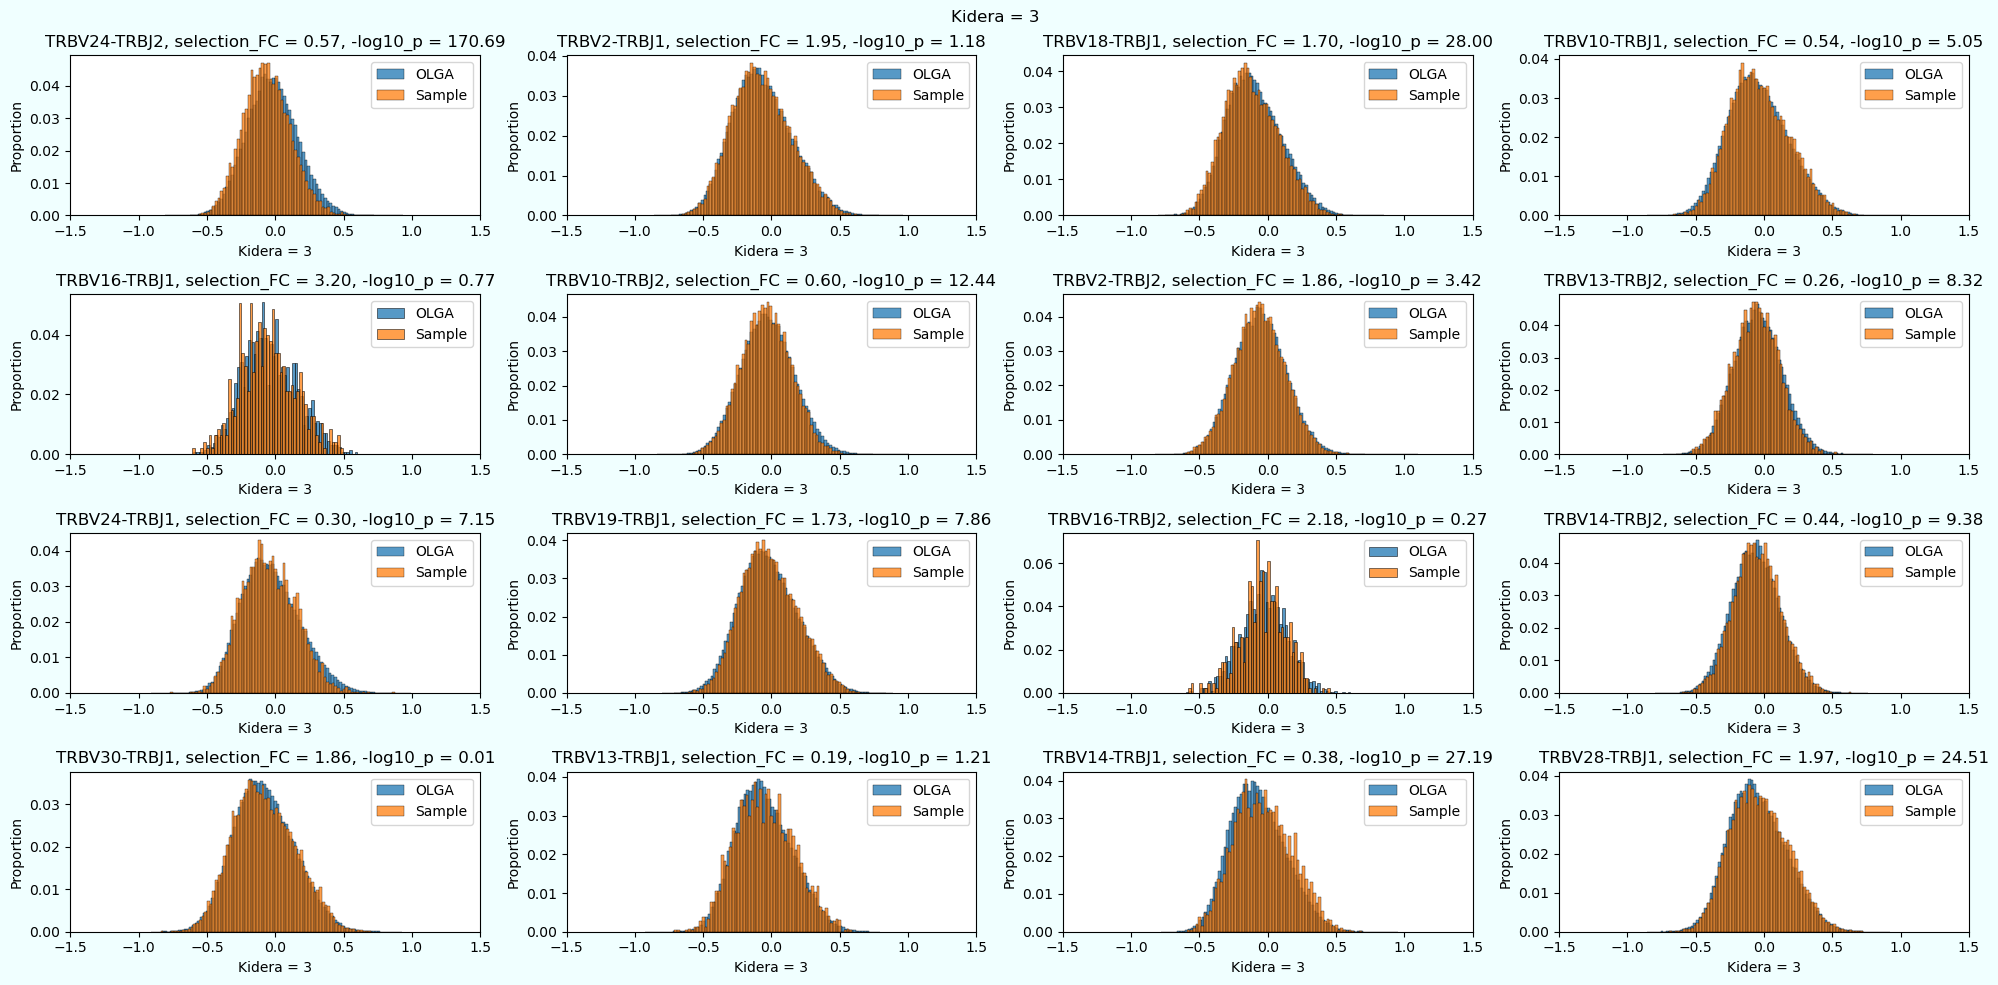

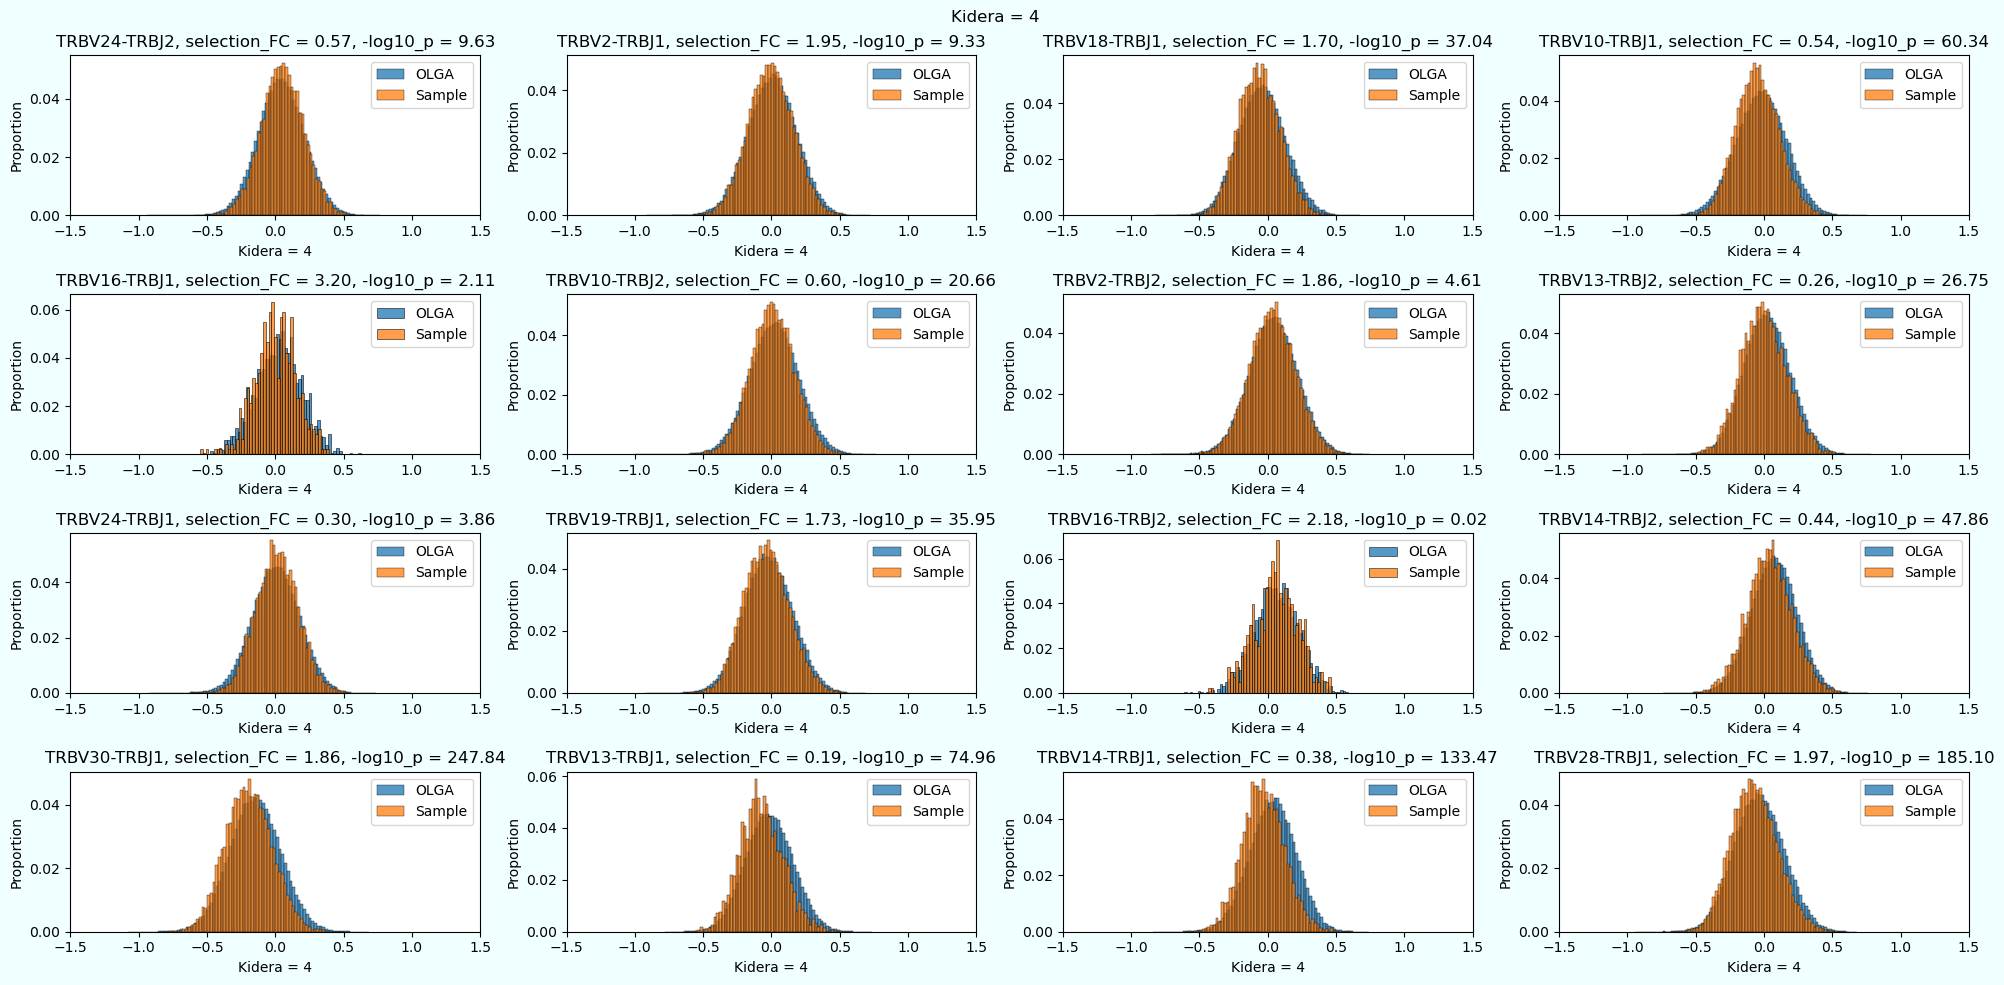

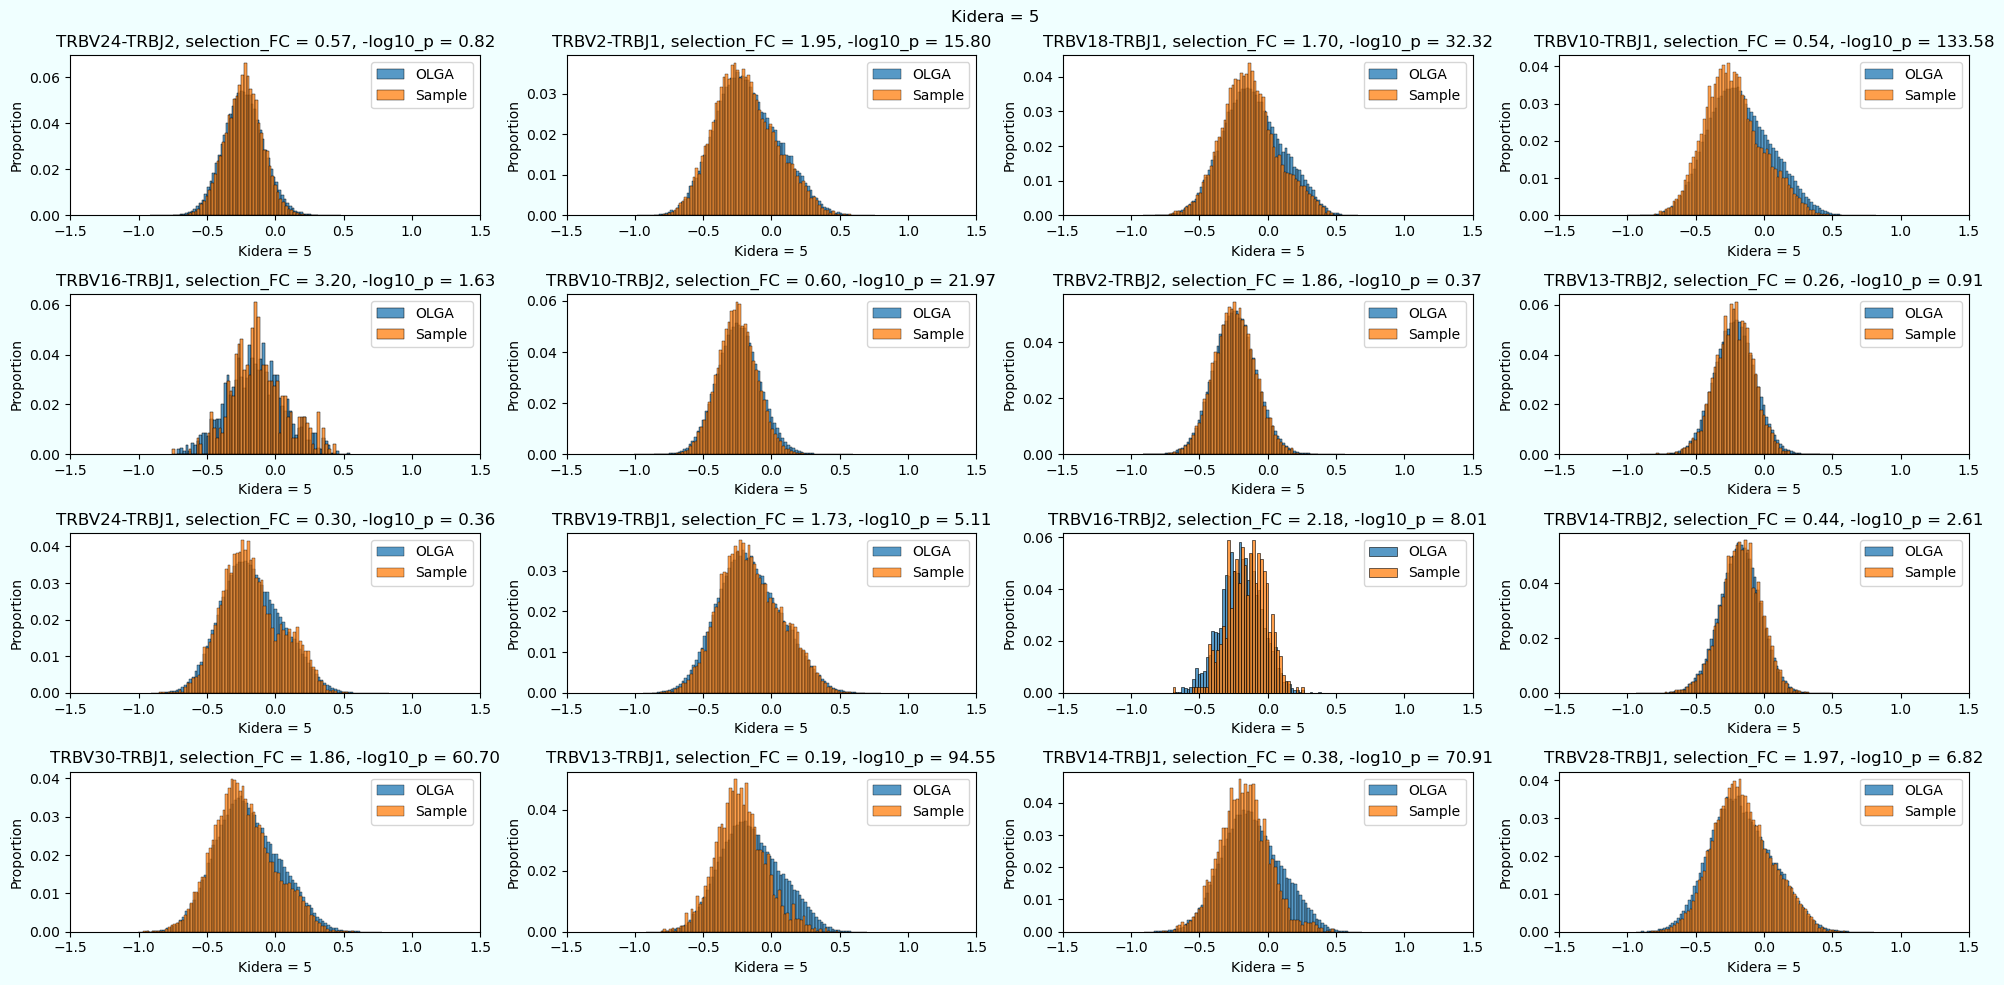

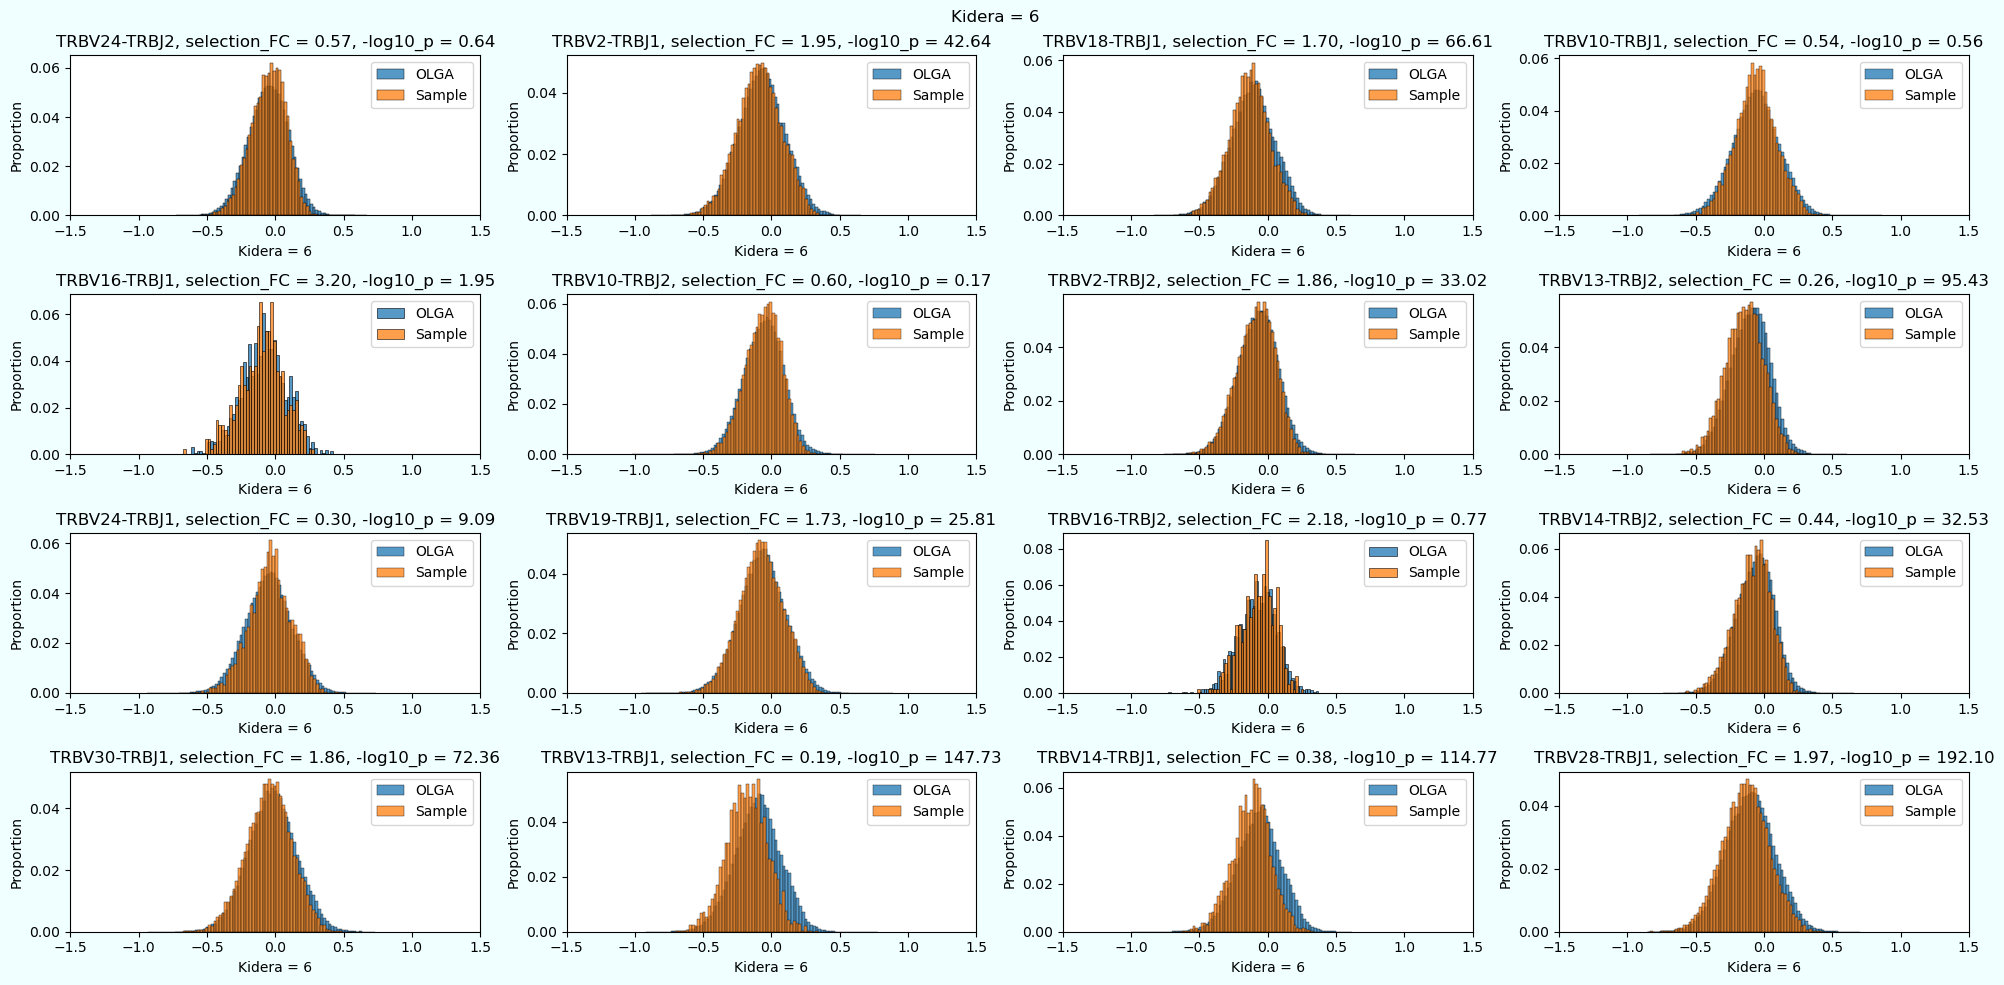

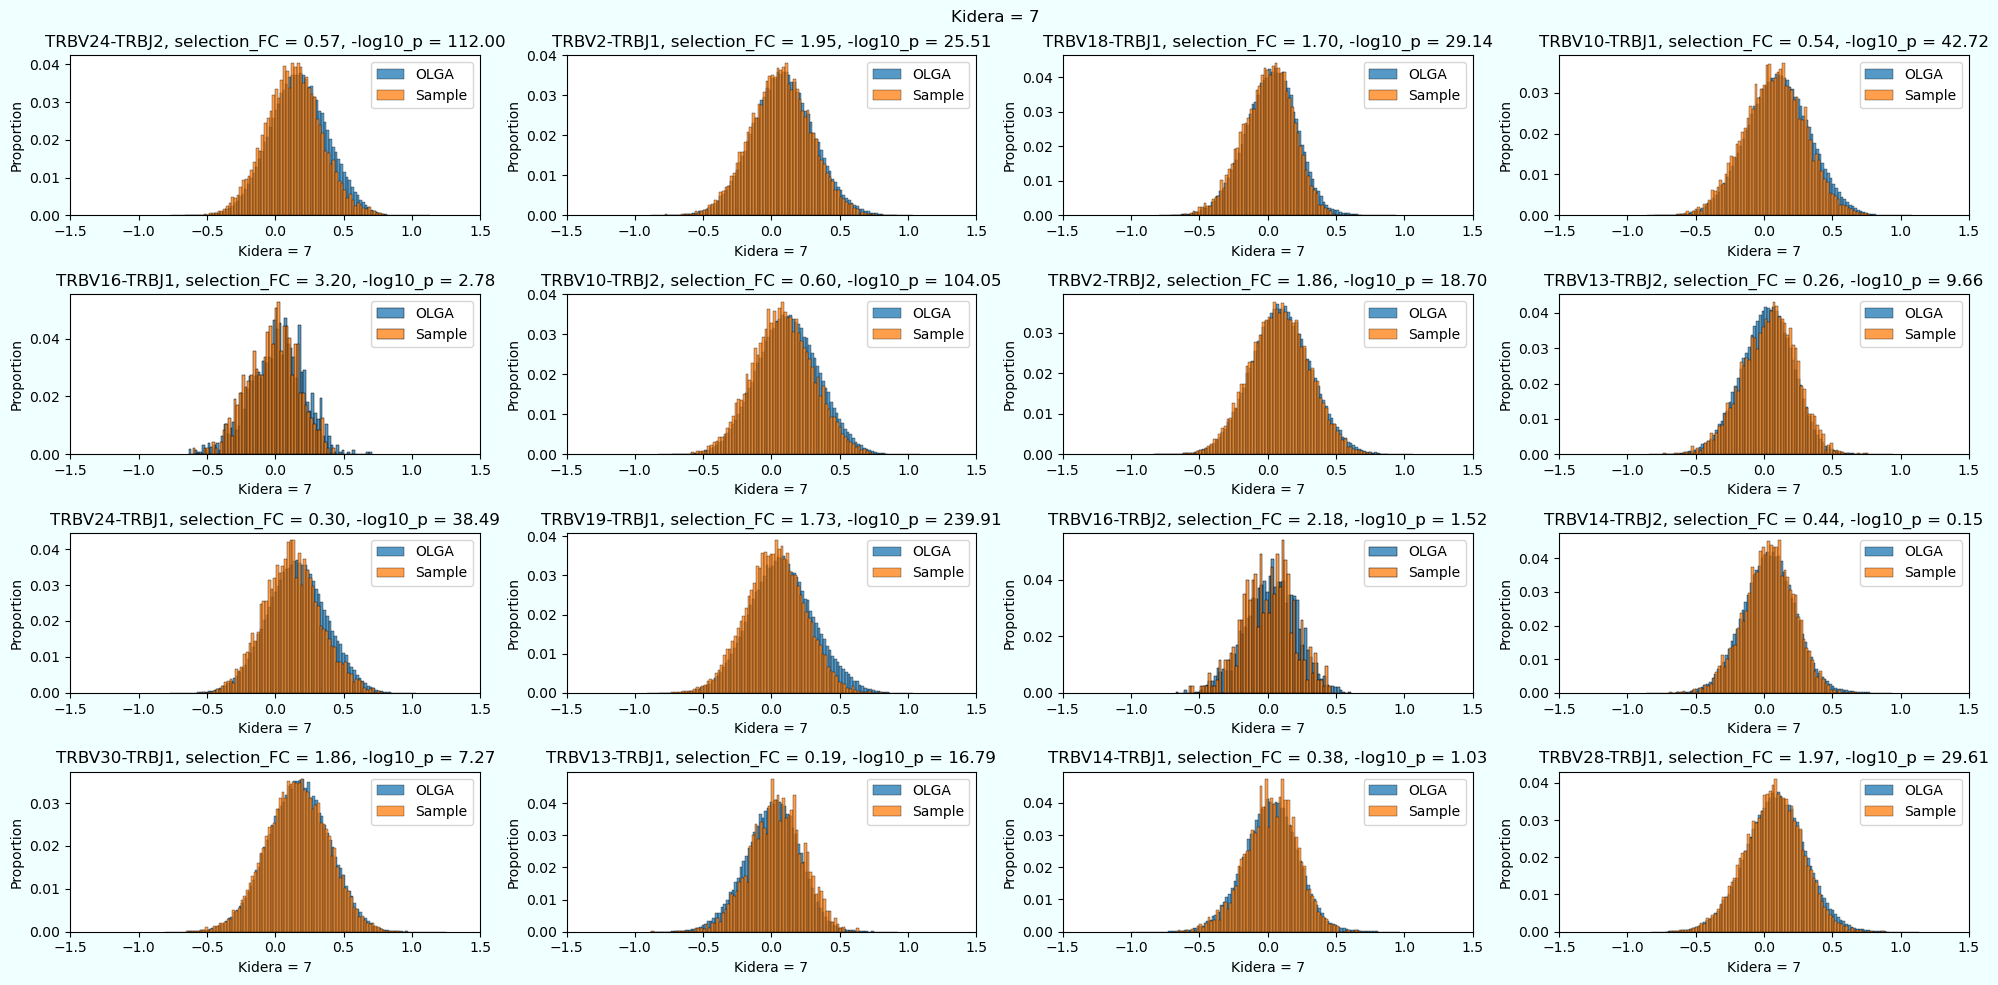

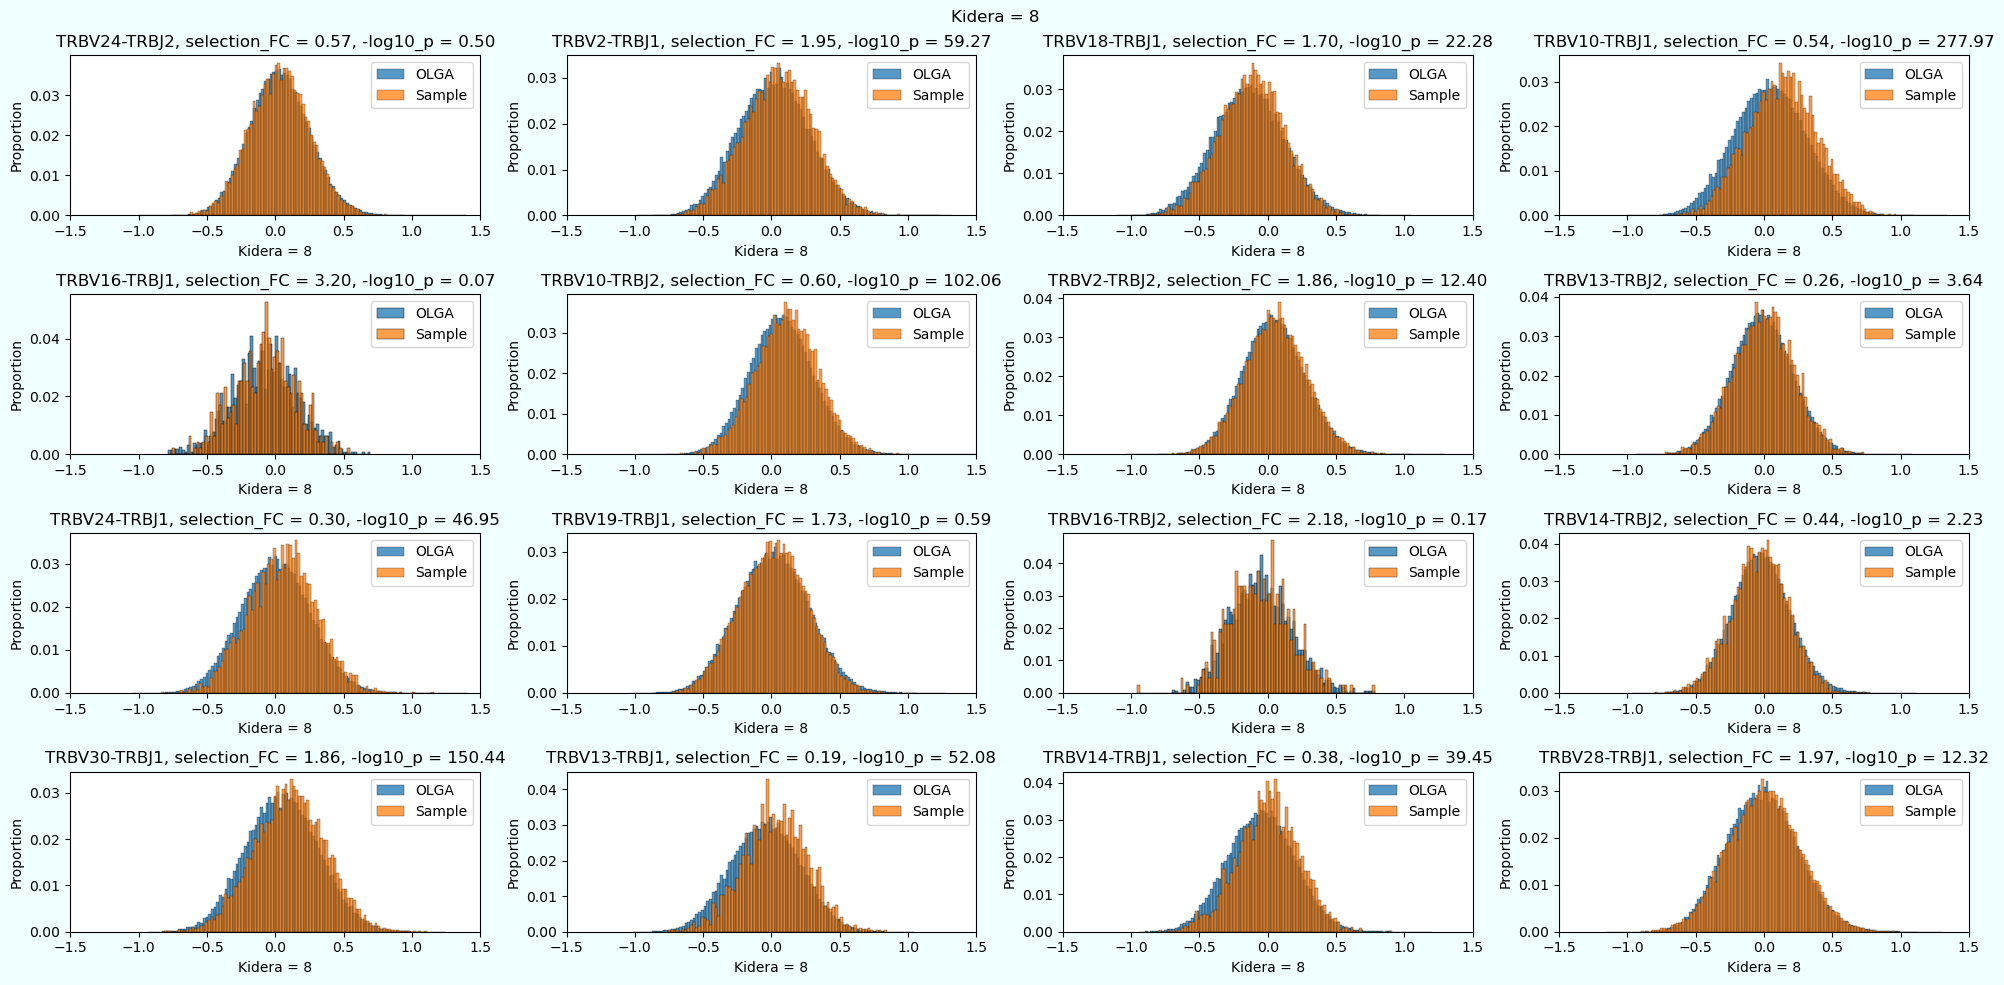

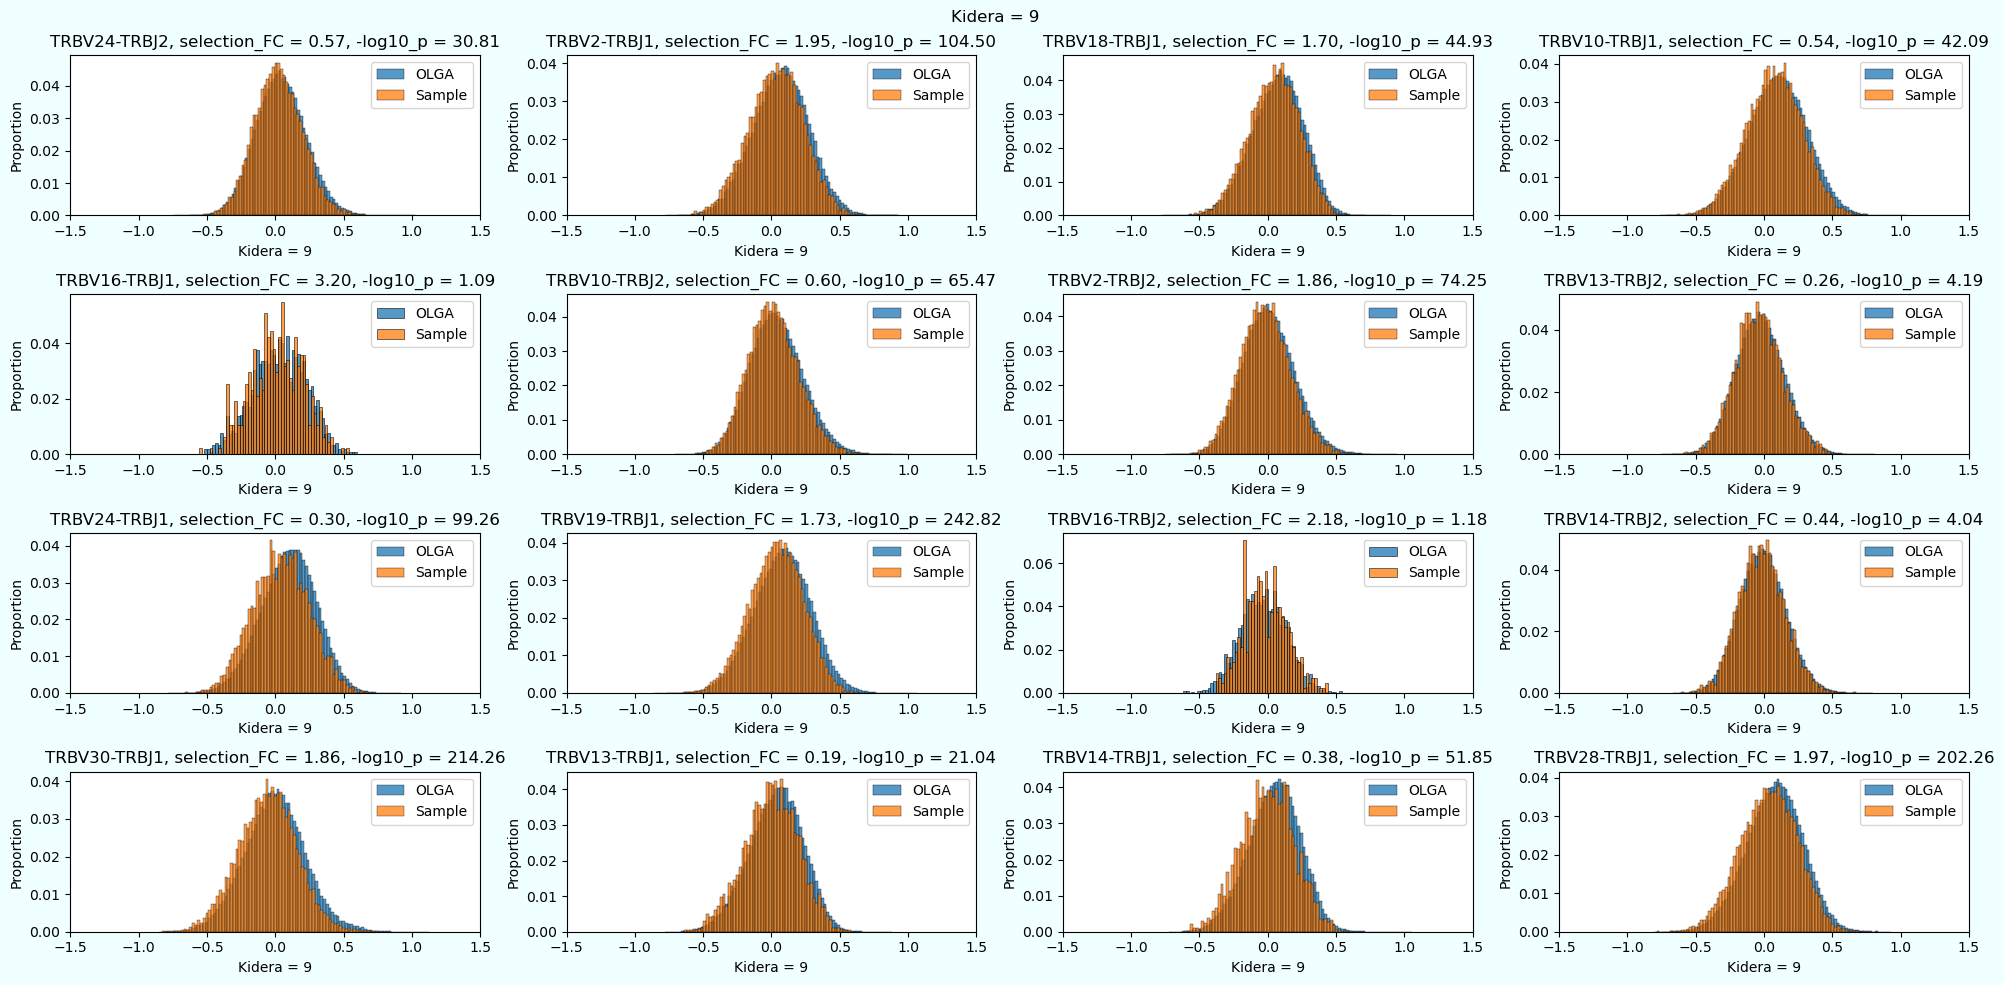

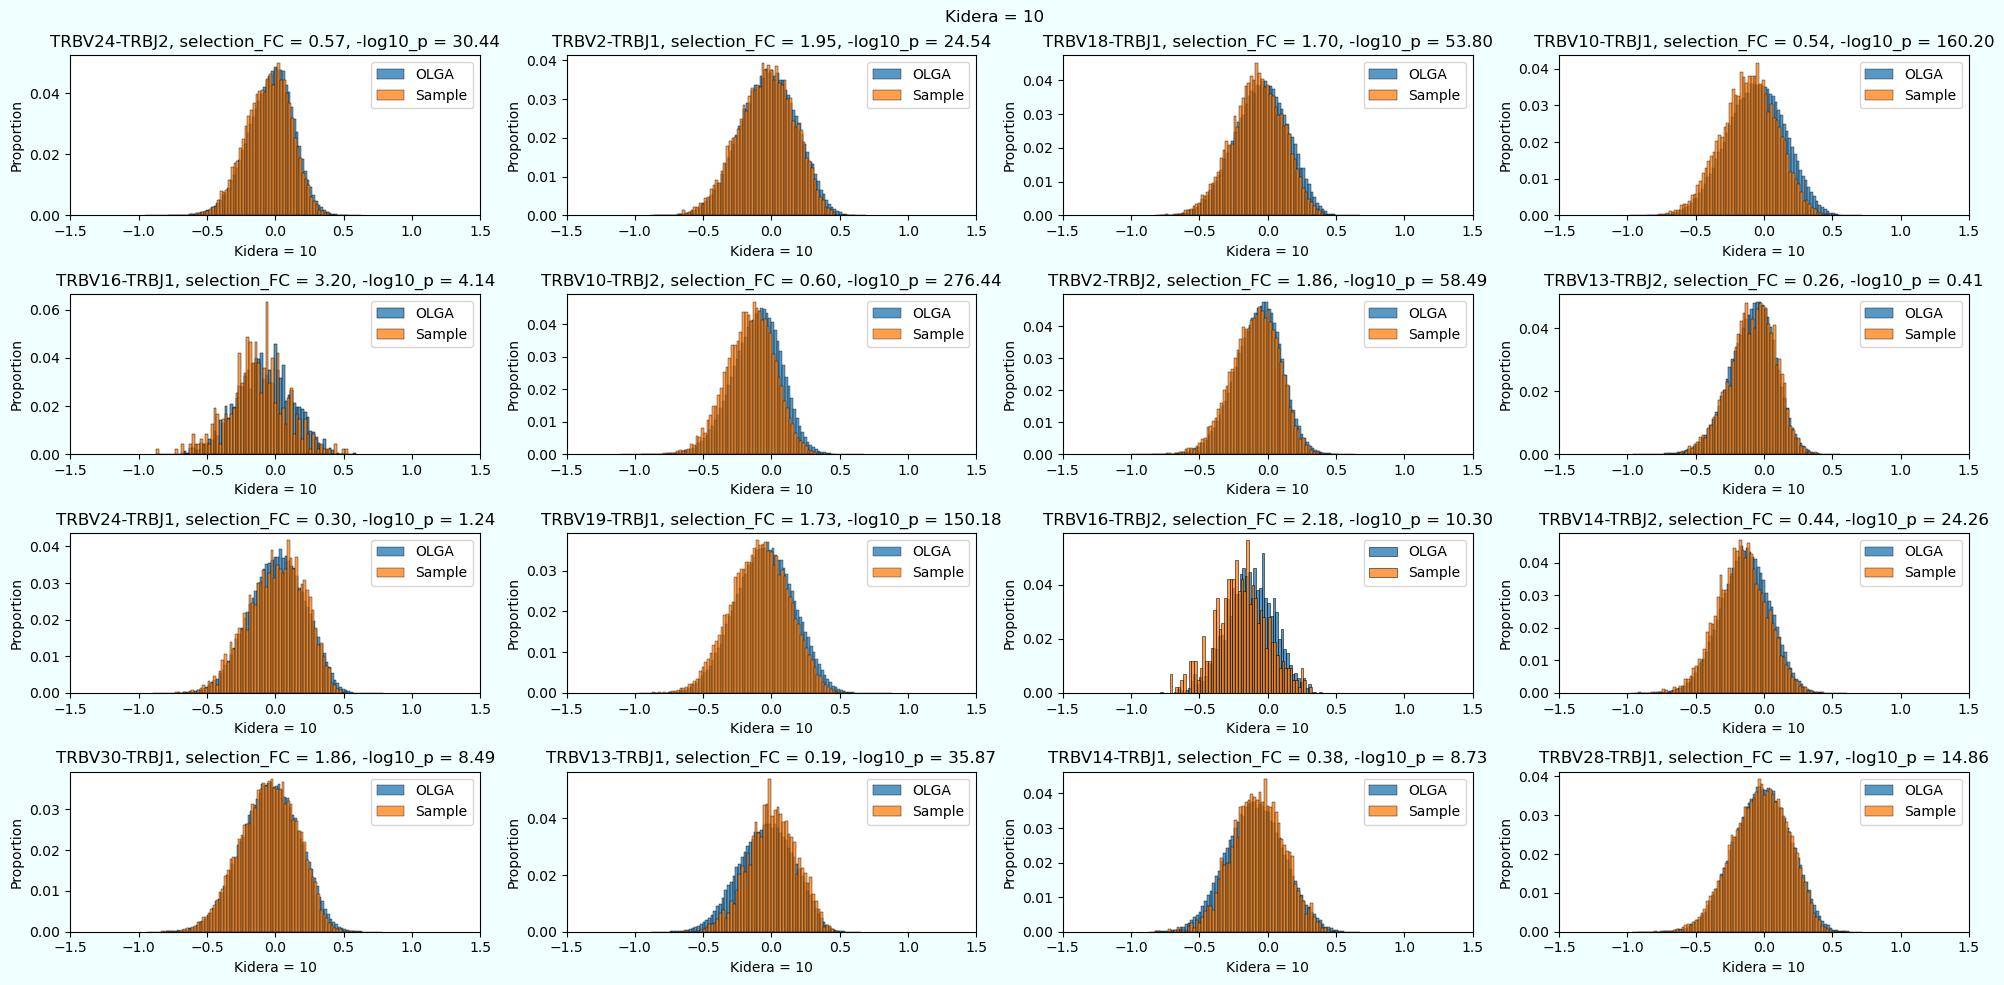

In [41]:
for kidera in range(1, 11):
    
    fig, axs = plt.subplots(4, 4, figsize=(20, 10), facecolor = 'azure')
    for gene, ax in zip(comp_pairs_freq_sign.index, axs.ravel()):
        
        olga_kidera = olga_kid[olga_kid.VJ == gene][str(kidera - 1)]
        sample_kidera = keck_kid[keck_kid.VJ == gene][str(kidera - 1)]
        sns.histplot(olga_kidera,
                    binwidth= 0.02 , stat = 'proportion', label = 'OLGA', ax=ax)
        sns.histplot(sample_kidera,
                    binwidth= 0.02 , stat = 'proportion', label = 'Sample', ax = ax)

        selection = 'Positive' if comp_pairs_freq_sign[gene] > 1 else 'Negative'
        log10_pval = -np.log10(scp.stats.ttest_ind(sample_kidera, olga_kidera, equal_var = False).pvalue)
        ax.set_title(f'{gene}, selection_FC = {comp_pairs_freq_sign[gene]:.2f}, -log10_p = {log10_pval:.2f}')
        ax.legend()
        ax.set_xlim([-1.5, 1.5])
        ax.set_xlabel(f'Kidera = {kidera}')
    fig.suptitle(f'Kidera = {kidera}')
    fig.tight_layout()
    plt.show()

# Inpairs scaling

In [7]:
keck_raw = pd.read_csv('keck_charge_hydrophobicity.csv', index_col=0)
olga_trb = pd.read_csv('/home/dluppov/olga_trb_charge_hydrophobicity.csv', index_col=0)

olga_trb.V_gene = olga_trb.V_gene.apply(lambda x: x.split('-')[0])
olga_trb.J_gene = olga_trb.J_gene.apply(lambda x: x.split('-')[0])
olga_trb.insert(4, 'VJ', olga_trb.V_gene + '-' + olga_trb.J_gene)


keck_raw.v = keck_raw.v.apply(lambda x: x.split(',')[0].split('-')[0])
keck_raw.j = keck_raw.j.apply(lambda x: x.split(',')[0].split('-')[0])

keck_raw.insert(3, 'VJ', keck_raw.v + '-' + keck_raw.j)
keck_vj_freq = keck_raw.VJ.value_counts()
olga_trb_vj_freq = olga_trb.VJ.value_counts()

common_pairs = list(set(olga_trb_vj_freq.index).intersection(set(keck_vj_freq.index)))

olga_trb_vj_freq = olga_trb_vj_freq[common_pairs]
keck_vj_freq = keck_vj_freq[common_pairs]

In [19]:
keck_raw.index = ['keck' for _ in range(len(keck_raw))]

In [20]:
olga_trb.index = ['olga' for _ in range(len(olga_trb))]

In [21]:
olga_trb.rename(columns = {'aa.1': 'hydrophobicity'}, inplace=True)
keck_raw.rename(columns = {'cdr3aa.1': 'hydrophobicity'}, inplace=True)

In [22]:
scaled_all = pd.concat([keck_raw[['VJ', 'charge']], olga_trb[['VJ', 'charge']]])

In [23]:
Mean=scaled_all.groupby("VJ").charge.transform('mean')    
Std=scaled_all.groupby("VJ").charge.transform('std')
scaled_all = (scaled_all.charge - Mean) / Std
scaled_all

keck   -0.430193
keck   -0.527675
keck   -0.377764
keck    0.654881
keck    1.337628
          ...   
olga    1.256952
olga   -0.857458
olga   -0.804314
olga    0.536553
olga    1.299675
Name: charge, Length: 11147250, dtype: float64

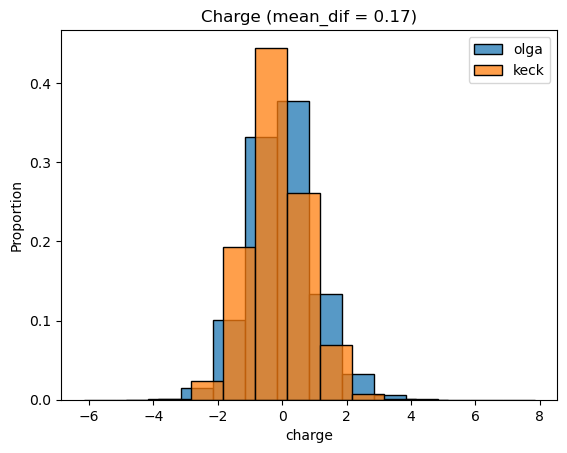

In [24]:
sns.histplot(scaled_all['olga'], binwidth= 1,label = 'olga', stat = 'proportion')
sns.histplot(scaled_all['keck'], binwidth= 1,label = 'keck', stat = 'proportion')
plt.legend()
mean_dif = scaled_all["olga"].mean() - scaled_all["keck"].mean()
plt.title(f'Charge (mean_dif = {mean_dif:.2f})')
plt.show()

In [25]:
scaled_all = pd.concat([keck_raw[['VJ', 'hydrophobicity']], olga_trb[['VJ', 'hydrophobicity']]])

Mean=scaled_all.groupby("VJ").hydrophobicity.transform('mean')    
Std=scaled_all.groupby("VJ").hydrophobicity.transform('std')
scaled_all = (scaled_all.hydrophobicity - Mean) / Std
scaled_all

keck    1.568046
keck    1.614191
keck    0.035492
keck   -0.781490
keck    0.076440
          ...   
olga    0.672220
olga   -1.414195
olga    0.325296
olga   -1.609945
olga    0.028171
Name: hydrophobicity, Length: 11147250, dtype: float64

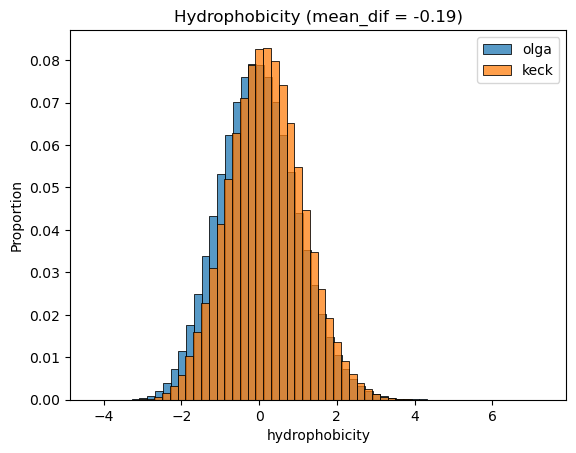

In [26]:
sns.histplot(scaled_all['olga'], binwidth= 0.2,label = 'olga', stat = 'proportion')
sns.histplot(scaled_all['keck'], binwidth= 0.2,label = 'keck', stat = 'proportion')
plt.legend()
mean_dif = scaled_all["olga"].mean() - scaled_all["keck"].mean()
plt.title(f'Hydrophobicity (mean_dif = {mean_dif:.2f})')
plt.show()

In [4]:
def kidera_series(x):
    return pd.Series(peptides.Peptide(x).kidera_factors())

In [28]:
keck_all_kideras = keck_raw.cdr3aa.apply(lambda x: kidera_series(x))
keck_all_kideras

0         1         2         3         4         5         6  \
keck -0.246154 -0.463846 -0.327692 -0.222308 -0.275385 -0.344615  0.208462   
keck -0.007333 -0.540667 -0.088000 -0.184000 -0.150667 -0.336667  0.084667   
keck  0.307333 -0.488000  0.022667  0.036000 -0.124000 -0.026667  0.039333   
keck  0.188125 -0.158750 -0.221875  0.150625 -0.101875 -0.103750  0.171875   
keck  0.037333 -0.299333  0.100000  0.110667 -0.326667 -0.110000  0.269333   
...        ...       ...       ...       ...       ...       ...       ...   
keck  0.194667 -0.648000 -0.182667 -0.022667 -0.113333 -0.034667  0.192667   
keck -0.330000 -0.316923  0.120769  0.051538 -0.156154  0.091538  0.241538   
keck -0.152857 -0.672857 -0.040000 -0.092857 -0.495000 -0.109286  0.106429   
keck -0.291818 -0.287273 -0.209091 -0.127273 -0.590000 -0.202727 -0.079091   
keck -0.086429 -0.491429  0.269286 -0.107857 -0.425714 -0.259286 -0.255000   

             7         8         9  
keck  0.060769  0.230000 -0.235385  
keck  0.142667 -0.020667 -0.113333  
keck  0.155333 -0.128000 -0.220000  
keck  0.002500  0.267500 -0.171250  
keck  0.218000  0.044667 -0.036000  
...        ...       ...       ...  
keck  0.004667  0.003333 -0.290667  
keck  0.093846  0.208462  0.066154  
keck  0.217143 -0.007143 -0.110000  
keck -0.000909  0.279091 -0.030909  
keck -0.442143  0.093571 -0.085714  

[1147250 rows x 10 columns]

In [29]:
pd.concat([keck_raw[["VJ", "cdr3aa"]], keck_all_kideras], axis = 1).to_csv('keck_all_kideras.csv')

In [5]:
olga_trb_all_kideras = olga_trb.aa.apply(lambda x: kidera_series(x))
olga_trb_all_kideras

0         1         2         3         4         5         6  \
0        0.063333 -0.077500 -0.085000  0.154167 -0.273333  0.047500 -0.111667   
1        0.547692 -0.356154  0.353077 -0.046923 -0.426154  0.172308  0.541538   
2        0.660000 -0.501250  0.120625 -0.133125  0.106875 -0.064375 -0.063125   
3        0.209500 -0.217500 -0.009500 -0.227500 -0.106000 -0.365500 -0.035500   
4        0.128889 -0.245000  0.083333  0.186667 -0.187778 -0.033889  0.451667   
...           ...       ...       ...       ...       ...       ...       ...   
9999995  0.284000 -0.547333  0.052000 -0.071333 -0.063333 -0.073333  0.166000   
9999996  0.352857 -0.482143  0.032143  0.082143 -0.408571  0.071429  0.179286   
9999997  0.007143  0.045000 -0.104286  0.237857 -0.227143 -0.192143  0.280000   
9999998 -0.074118  0.137647  0.030588 -0.200588 -0.341176 -0.154706 -0.117059   
9999999  0.526250 -0.283750  0.011875 -0.368750 -0.208125 -0.178125  0.086250   

                7         8         9  
0        0.018333  0.068333 -0.277500  
1        0.438462 -0.151538  0.426154  
2        0.419375 -0.057500  0.055625  
3       -0.227500  0.225500 -0.026000  
4        0.155556 -0.127778 -0.163333  
...           ...       ...       ...  
9999995  0.470000 -0.167333 -0.143333  
9999996  0.595714 -0.079286  0.003571  
9999997 -0.277857  0.336429 -0.127857  
9999998  0.097059  0.267059 -0.234118  
9999999  0.556250 -0.241250 -0.023125  

[10000000 rows x 10 columns]

In [1]:
olga_trb.V_gene = olga_trb.V_gene.apply(lambda x: x.split('-')[0])
olga_trb.J_gene = olga_trb.J_gene.apply(lambda x: x.split('-')[0])
olga_trb.insert(4, 'VJ', olga_trb.V_gene + '-' + olga_trb.J_gene)
olga_trb_vj_freq = olga_trb_vj_freq[common_pairs]


In [9]:
pd.concat([olga_trb[["VJ", "aa"]], olga_trb_all_kideras], axis = 1).to_csv('OLGA_all_kideras_1.csv')

In [30]:
olga_kid = pd.read_csv('~/OLGA_all_kideras.csv', index_col=0)
keck_kid = pd.read_csv('keck_all_kideras.csv', index_col=0)

In [31]:
scaled_all = pd.concat([olga_kid.drop('aa', axis=1), keck_kid.drop('cdr3aa', axis=1)])

Mean=scaled_all.groupby("VJ").transform('mean')    
Std=scaled_all.groupby("VJ").transform('std')
scaled_all = (scaled_all - Mean) / Std
scaled_all

0         1         2         3         4         5         6  \
olga  0.313515 -1.793435  1.054339 -0.407009 -0.861059 -0.827004  1.885771   
olga  0.152326  1.983428 -0.642669  1.785037  0.371210  0.945351  1.786181   
olga -1.330364 -0.294278 -0.102160 -1.209557 -0.869920 -0.897093 -0.425880   
olga  0.585017  1.366626  0.520981  1.614482 -0.895666  1.453352  0.815590   
olga -1.741256 -0.641078 -0.319977  0.155492 -0.967276 -0.991255  1.396214   
...        ...       ...       ...       ...       ...       ...       ...   
keck -0.207132 -1.282910 -0.398794  0.129818 -0.015595  0.464754  0.905745   
keck -1.814236  0.277077  0.782257  0.512503  0.024160  1.103800  0.739716   
keck -1.092069 -1.477870 -0.097875 -0.386896 -1.467978 -0.249222  0.160981   
keck -1.670062  0.425867 -0.789194 -0.478504 -1.890289 -0.535543 -0.735243   
keck -0.888538 -0.462793  1.614558 -0.338801 -1.198853 -0.693966 -1.449904   

             7         8         9  VJ  
olga  0.414149 -1.741706  1.757283 NaN  
olga  1.386160  0.548980  1.169011 NaN  
olga  0.665480  0.528356  0.090391 NaN  
olga  1.153676  1.587622 -0.681909 NaN  
olga -0.476183 -0.422397  1.385266 NaN  
...        ...       ...       ...  ..  
keck  0.532264 -0.344602 -1.209503 NaN  
keck  0.397018  0.671932  0.415391 NaN  
keck  0.783202 -0.390553 -0.251192 NaN  
keck  0.035146  1.014531 -0.058693 NaN  
keck -1.644020  0.233092 -0.346407 NaN  

[11147250 rows x 11 columns]

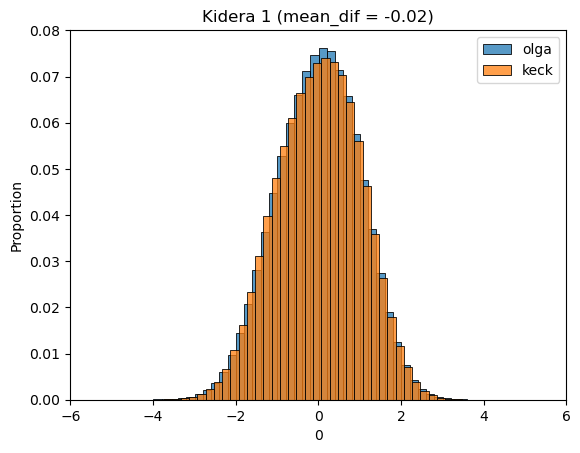

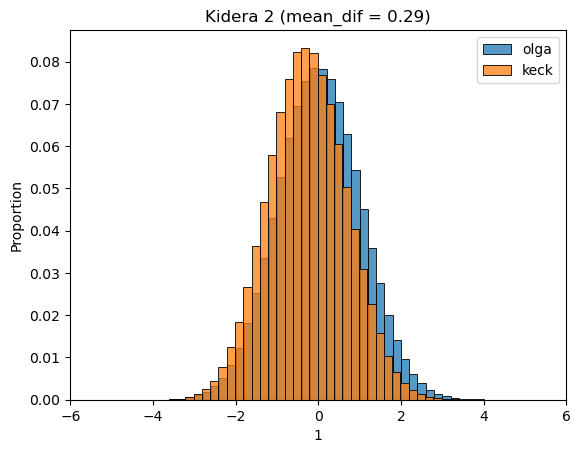

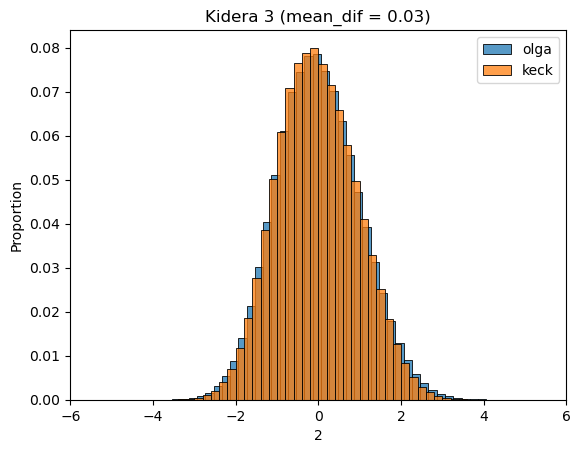

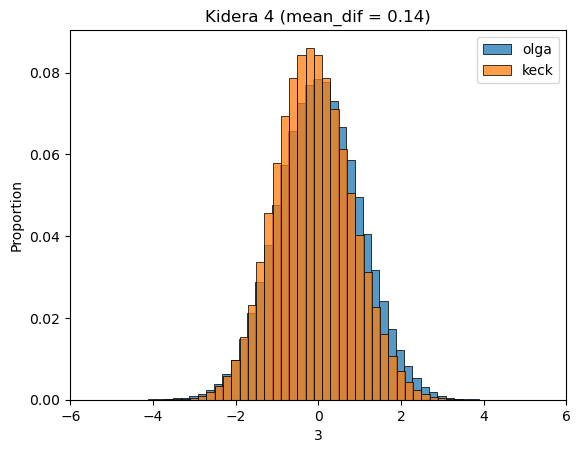

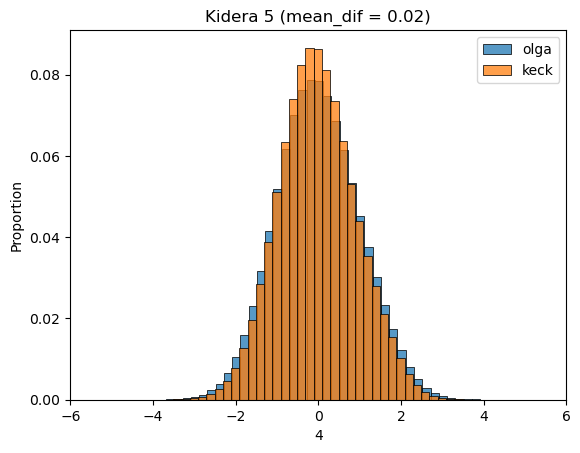

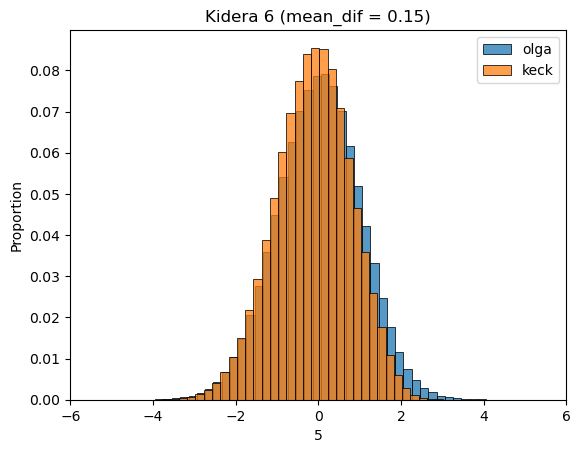

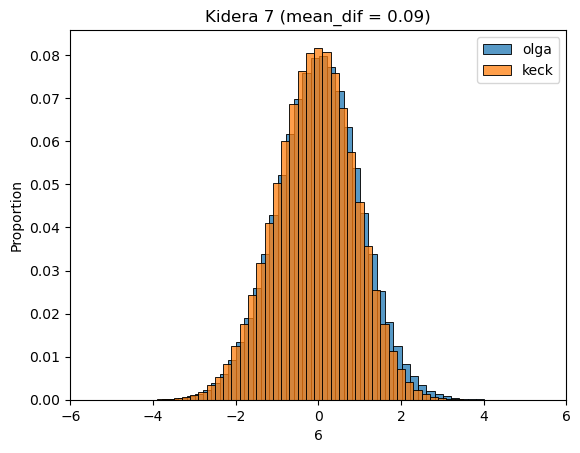

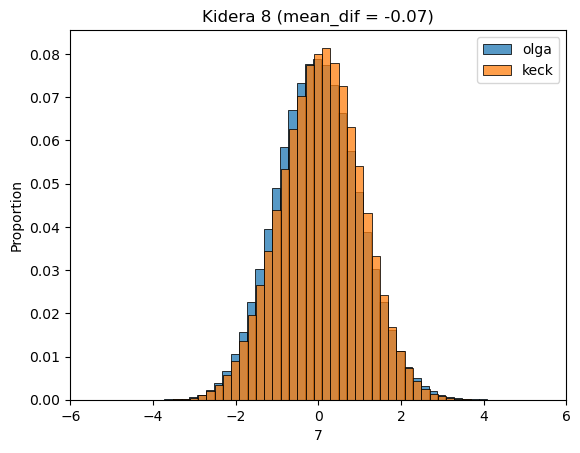

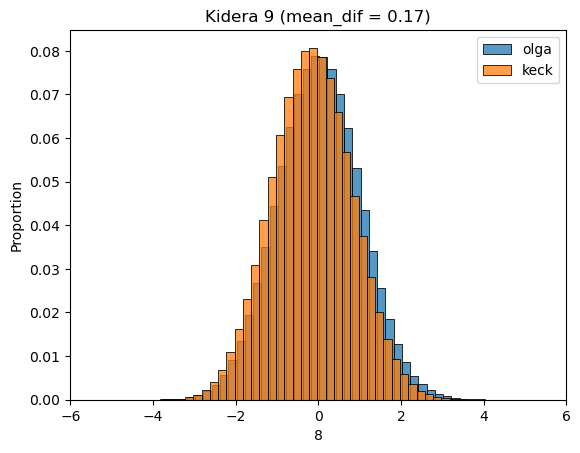

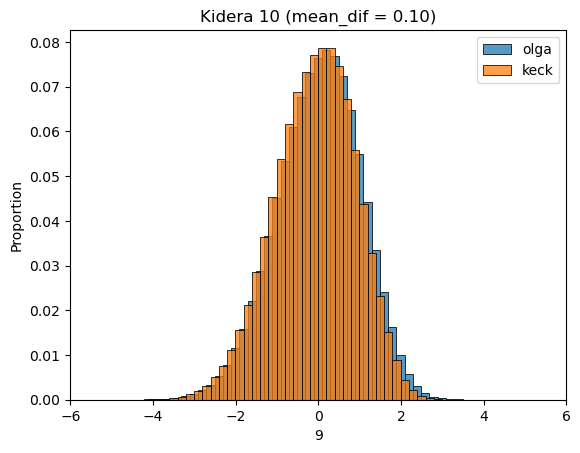

In [32]:
scaled_all = scaled_all.drop('VJ', axis = 1)

for kid_ind in scaled_all.columns:
    
    sns.histplot(scaled_all[kid_ind]['olga'], binwidth= 0.2,label = 'olga', stat = 'proportion')
    sns.histplot(scaled_all[kid_ind]['keck'], binwidth= 0.2,label = 'keck', stat = 'proportion')
    plt.legend()
    mean_dif = scaled_all[kid_ind]['olga'].mean() - scaled_all[kid_ind]['keck'].mean()
    plt.title(f'Kidera {int(kid_ind)+ 1} (mean_dif = {mean_dif:.2f})')
    plt.xlim([-6, 6])
    plt.show()

# KIDERA Volcano

In [3]:
olga_kid = pd.read_csv('./OLGA_all_kideras_1.csv', index_col=0)
keck_kid = pd.read_csv('./keck_all_kideras.csv', index_col=0)

In [4]:
def cohens_d(x, y):
    
    n1 = len(x)
    n2 = len(y)
    s1 = x.std()
    s2 = y.std()
    s = (((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2))**(1/2)
    
    return (x.mean() - y.mean())/s

In [5]:
common_vj = list(set(keck_kid.VJ).intersection(set(olga_kid.VJ)))
len(common_vj)

46

In [15]:
#for each gene pair and for each KF we will calculate p_val and fold change to plot it on Volcano plot
#along with selection fraction 

import tqdm

volcano_list = []

for vj in tqdm.tqdm(common_vj):
    
    for kidera in range(0, 10):
        
        p_val = scp.stats.ttest_ind(olga_kid[olga_kid.VJ == vj][str(kidera)],
                            keck_kid[keck_kid.VJ == vj][str(kidera)], equal_var=False).pvalue
        
        logfc = np.log2(keck_kid[keck_kid.VJ == vj][str(kidera)].mean()/olga_kid[olga_kid.VJ == vj][str(kidera)].mean())
        
        selection = np.log2(comp_pairs_freq[vj])
        
        cohens_d_i = cohens_d(keck_kid[keck_kid.VJ == vj][str(kidera)],
                             olga_kid[olga_kid.VJ == vj][str(kidera)])
        
        volcano_list.append({
            'vj': vj,
            'kidera': kidera,
            "p_val": p_val,
            'logfc': logfc,
            'cohens_d': cohens_d_i,
            "selection": selection
        })

  0%|                                                    | 0/46 [00:00<?, ?it/s]/home/dluppov/.conda-envs/python3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log2
  from ipykernel import kernelapp as app
100%|███████████████████████████████████████████| 46/46 [19:50<00:00, 25.87s/it]


In [16]:
res_df = pd.DataFrame(volcano_list)
res_df.insert(0, 'vj_kidera', res_df.vj+ '-kidera_' + res_df.kidera.apply(lambda x: str(x+1)))
res_df.insert(0, 'logp_val', -res_df.p_val.apply(lambda x: np.log10(x) if x > 10**(-200) else np.log10(10**(-200))))
res_df

logp_val               vj_kidera            vj  kidera          p_val  \
0      0.213443   TRBV14-TRBJ1-kidera_1  TRBV14-TRBJ1       0   6.117254e-01   
1     44.903010   TRBV14-TRBJ1-kidera_2  TRBV14-TRBJ1       1   1.250230e-45   
2     31.826113   TRBV14-TRBJ1-kidera_3  TRBV14-TRBJ1       2   1.492407e-32   
3    173.340275   TRBV14-TRBJ1-kidera_4  TRBV14-TRBJ1       3  4.567988e-174   
4     88.971152   TRBV14-TRBJ1-kidera_5  TRBV14-TRBJ1       4   1.068680e-89   
..          ...                     ...           ...     ...            ...   
455   31.338697   TRBV18-TRBJ1-kidera_6  TRBV18-TRBJ1       5   4.584613e-32   
456   26.768825   TRBV18-TRBJ1-kidera_7  TRBV18-TRBJ1       6   1.702846e-27   
457   43.814774   TRBV18-TRBJ1-kidera_8  TRBV18-TRBJ1       7   1.531883e-44   
458   31.956112   TRBV18-TRBJ1-kidera_9  TRBV18-TRBJ1       8   1.106337e-32   
459  129.925724  TRBV18-TRBJ1-kidera_10  TRBV18-TRBJ1       9  1.186521e-130   

        logfc  cohens_d  selection  
0   -0.021278 -0.008652  -1.379601  
1    0.144168 -0.217515  -1.379601  
2   -1.128629  0.194073  -1.379601  
3         NaN -0.417121  -1.379601  
4    0.610300 -0.278185  -1.379601  
..        ...       ...        ...  
455  0.204360 -0.101375   0.925514  
456 -2.182314 -0.096721   0.925514  
457 -0.370840  0.119965   0.925514  
458 -0.479414 -0.106556   0.925514  
459  0.947319 -0.222009   0.925514  

[460 rows x 8 columns]

In [17]:
res_df.p_val = res_df.p_val.apply(lambda x: np.log10(x) if x > 10**(-100) else np.log10(10**(-100)))

In [18]:
logfc = np.log2(keck_kid[keck_kid.VJ == vj][str(kidera)].mean()/olga_kid[olga_kid.VJ == vj][str(kidera)].mean())


In [40]:
res_df.to_csv('kideras_plot_data.csv')

In [4]:
res_df = pd.read_csv('./kideras_plot_data.csv')

In [43]:
fig.write_html("VJ_kidera_volcano.html")

In [44]:
colorscales = px.colors.named_colorscales()

In [5]:
res_df.kidera = res_df.kidera.apply(lambda x: x +1)

Text(0, 0.5, 'log10 p')

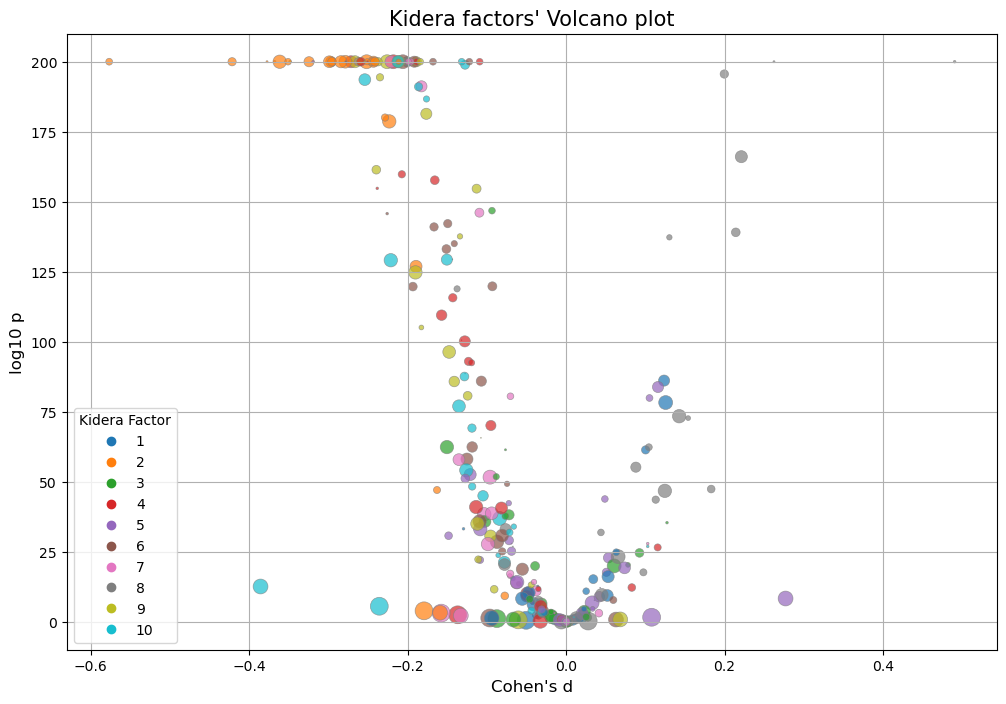

In [11]:
plt.figure(figsize=(12, 8))

color_dict = {1: '#1f77b4', 2: '#ff7f0e', 3: '#2ca02c', 4: '#d62728',
              5: '#9467bd', 6: '#8c564b', 7: '#e377c2', 8: '#7f7f7f',
              9: '#bcbd22', 10: '#17becf'}


plt.scatter(res_df.cohens_d,
            res_df.logp_val,
            c = res_df.kidera.apply(lambda x: color_dict[int(x)]),
            s = 100*res_df.selection,
           edgecolors='grey', linewidth=0.5, alpha = 0.7)

handles = [plt.plot([], [], marker="o", ls="", color=color_dict[i], label=str(i))[0] for i in color_dict]
plt.legend(handles=handles, title='Kidera Factor', fontsize = 10)
plt.grid()
plt.title("Kidera factors' Volcano plot", fontsize = 15)
plt.xlabel("Cohen's d", fontsize = 12)
plt.ylabel('log10 p', fontsize = 12)

In [48]:
res_df

logp_val               vj_kidera            vj kidera       p_val  \
0      0.213443   TRBV14-TRBJ1-kidera_1  TRBV14-TRBJ1      1   -0.213443   
1     44.903010   TRBV14-TRBJ1-kidera_2  TRBV14-TRBJ1      2  -44.903010   
2     31.826113   TRBV14-TRBJ1-kidera_3  TRBV14-TRBJ1      3  -31.826113   
3    173.340275   TRBV14-TRBJ1-kidera_4  TRBV14-TRBJ1      4 -100.000000   
4     88.971152   TRBV14-TRBJ1-kidera_5  TRBV14-TRBJ1      5  -88.971152   
..          ...                     ...           ...    ...         ...   
455   31.338697   TRBV18-TRBJ1-kidera_6  TRBV18-TRBJ1      6  -31.338697   
456   26.768825   TRBV18-TRBJ1-kidera_7  TRBV18-TRBJ1      7  -26.768825   
457   43.814774   TRBV18-TRBJ1-kidera_8  TRBV18-TRBJ1      8  -43.814774   
458   31.956112   TRBV18-TRBJ1-kidera_9  TRBV18-TRBJ1      9  -31.956112   
459  129.925724  TRBV18-TRBJ1-kidera_10  TRBV18-TRBJ1     10 -100.000000   

        logfc  cohens_d  selection  
0   -0.021278 -0.008652  -1.379601  
1    0.144168 -0.217515  -1.379601  
2   -1.128629  0.194073  -1.379601  
3         NaN -0.417121  -1.379601  
4    0.610300 -0.278185  -1.379601  
..        ...       ...        ...  
455  0.204360 -0.101375   0.925514  
456 -2.182314 -0.096721   0.925514  
457 -0.370840  0.119965   0.925514  
458 -0.479414 -0.106556   0.925514  
459  0.947319 -0.222009   0.925514  

[460 rows x 8 columns]

In [62]:
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
plt.rcParams.update(new_rc_params)

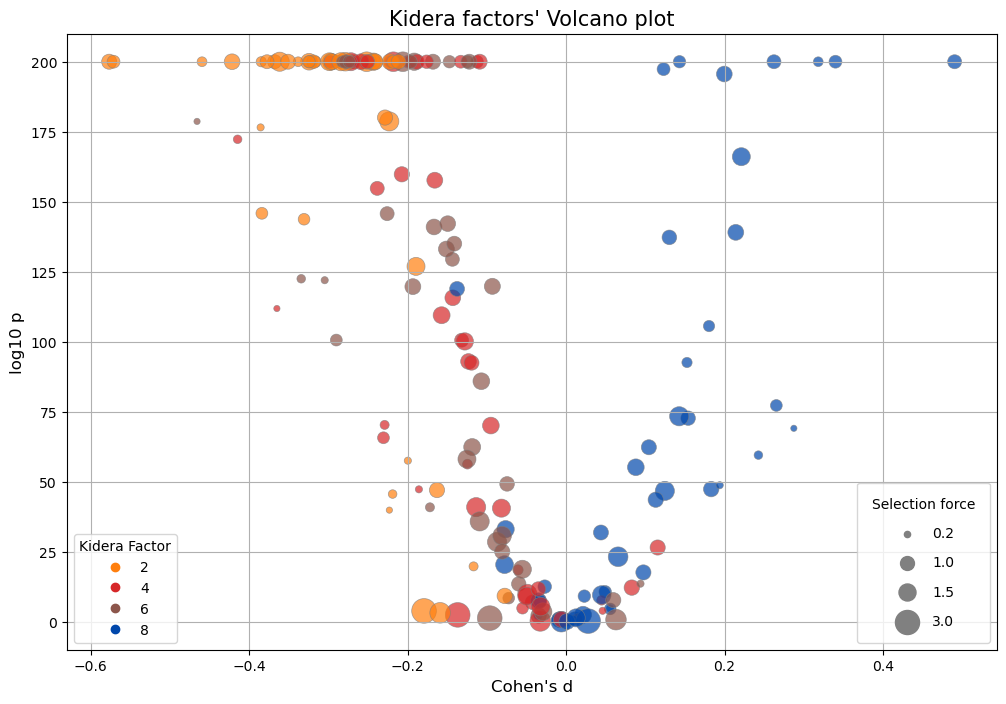

In [63]:
#пересохрани фигуру


plt.figure(figsize=(12, 8))

color_dict = {2: '#ff7f0e', 4: '#d62728', 6: '#8c564b', 8: '#0047AB'}


res_df_cutted = res_df[res_df.kidera.apply(lambda x: x in {2, 4, 6, 8})]

plt.scatter(res_df_cutted.cohens_d,
            res_df_cutted.logp_val,
            c = res_df_cutted.kidera.apply(lambda x: color_dict[int(x)]),
            s = 100*2**res_df_cutted.selection,
           edgecolors='grey', linewidth=0.5, alpha = 0.7)

handles = [plt.plot([], [], marker="o", ls="", color=color_dict[i], label=str(i))[0] for i in color_dict]
legend = pyplot.legend(handles=handles, title='Kidera Factor', fontsize = 10)
plt.grid()
plt.title("Kidera factors' Volcano plot", fontsize = 15)
plt.xlabel("Cohen's d", fontsize = 12)
plt.ylabel('log10 p', fontsize = 12)

sizes = [20, 100, 150, 300]
handles = [plt.scatter([], [], c = 'grey', marker="o", s = i, label=str(i/100)) for i in sizes]

legend1 = pyplot.legend(handles=handles, title='Selection force', fontsize = 10, loc = 4, labelspacing=1.1, borderpad=1.05)

plt.gca().add_artist(legend)


plt.savefig('/home/dluppov/Paper_figs/fig1c.svg', format = 'svg')

In [49]:
fig.write_html("VJ_kidera_volcano_4.html")